## 1. Define the problem and perform Exploratory Data Analysis

In [1]:
# Importing Necessary Libraries


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose

### 1.1 Read the data as an appropriate time series data

In [2]:
# Loading dataset using read function
df=pd.read_csv('Rose.csv')

In [3]:
# Checking the data whether loaded properly by head and tail functions
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [6]:
df = pd.read_csv('Rose.csv',parse_dates=['YearMonth'])
df.head()

YearMonth   Rose
0 1980-01-01  112.0
1 1980-02-01  118.0
2 1980-03-01  129.0
3 1980-04-01   99.0
4 1980-05-01  116.0

In [7]:
df.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [8]:
df = pd.read_csv('Rose.csv',parse_dates=['YearMonth'],index_col='YearMonth')
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

### 1.2 Plot the data 

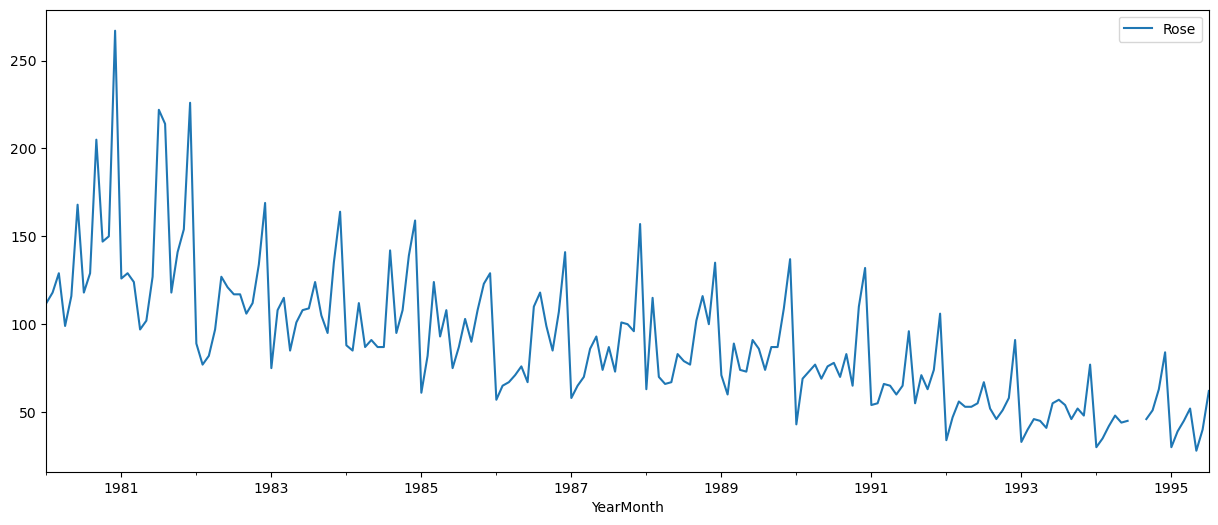

In [9]:
rcParams['figure.figsize'] = 15,6
df.plot();

### 1.3 Perform EDA 

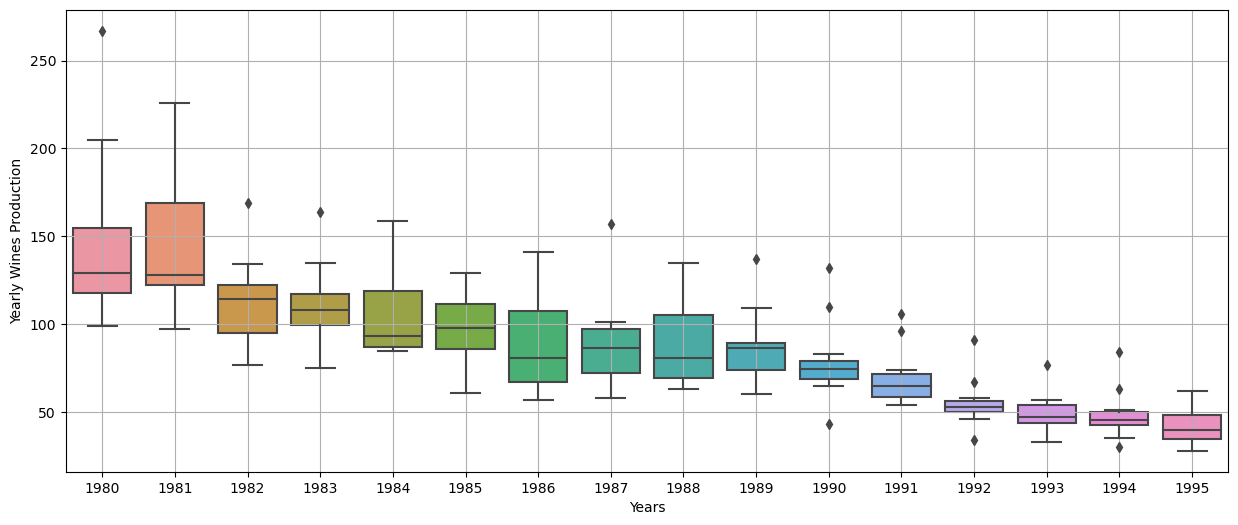

In [10]:
sns.boxplot(x=df.index.year, y='Rose', data=df)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wines Production');

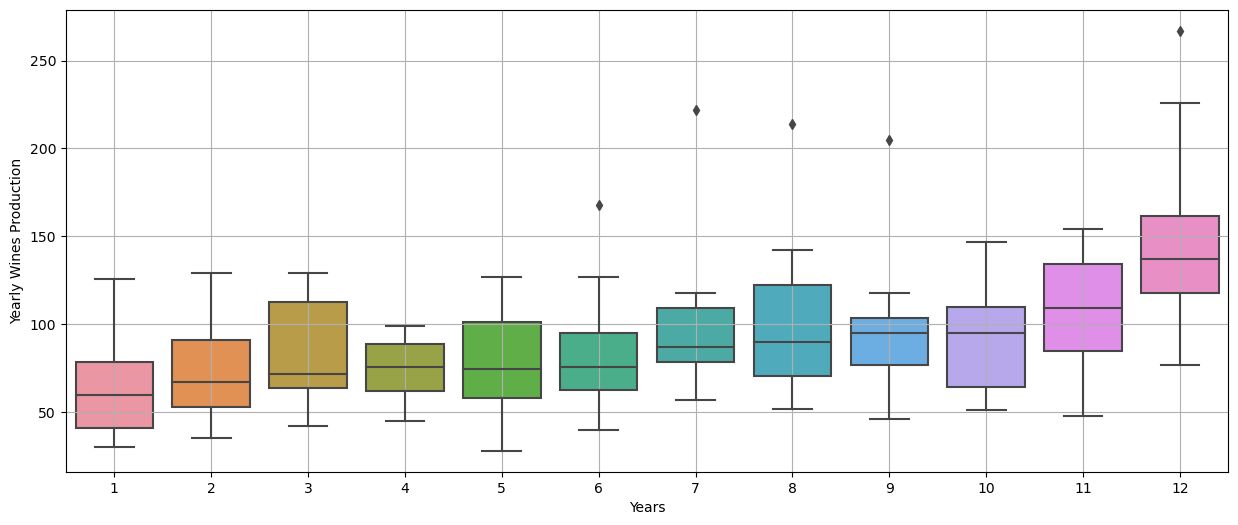

In [11]:
sns.boxplot(x=df.index.month, y='Rose', data=df)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wines Production');

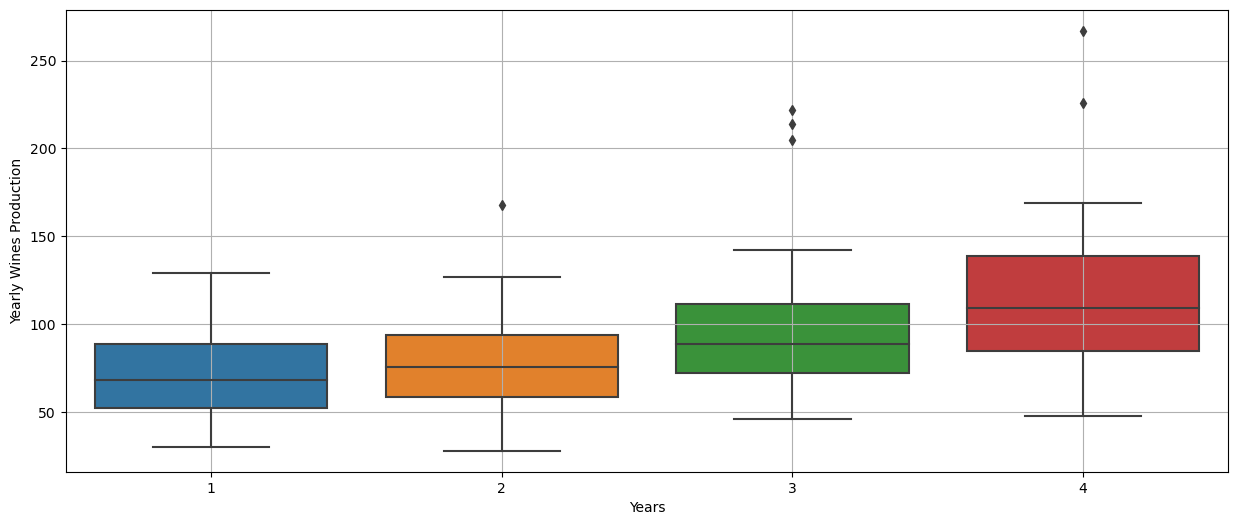

In [12]:
sns.boxplot(x=df.index.quarter, y='Rose', data=df)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wines Production');

<Axes: xlabel='YearMonth', ylabel='Rose'>

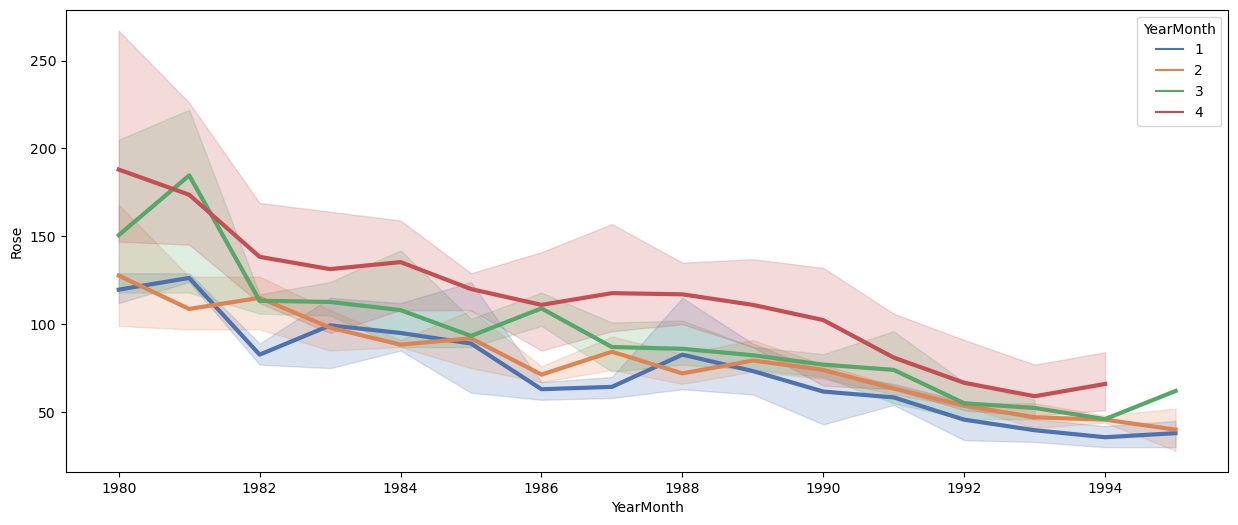

In [13]:
sns.lineplot(x=df.index.year, y=df['Rose'], hue=df.index.quarter, palette='deep', linewidth=3)

In [14]:
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

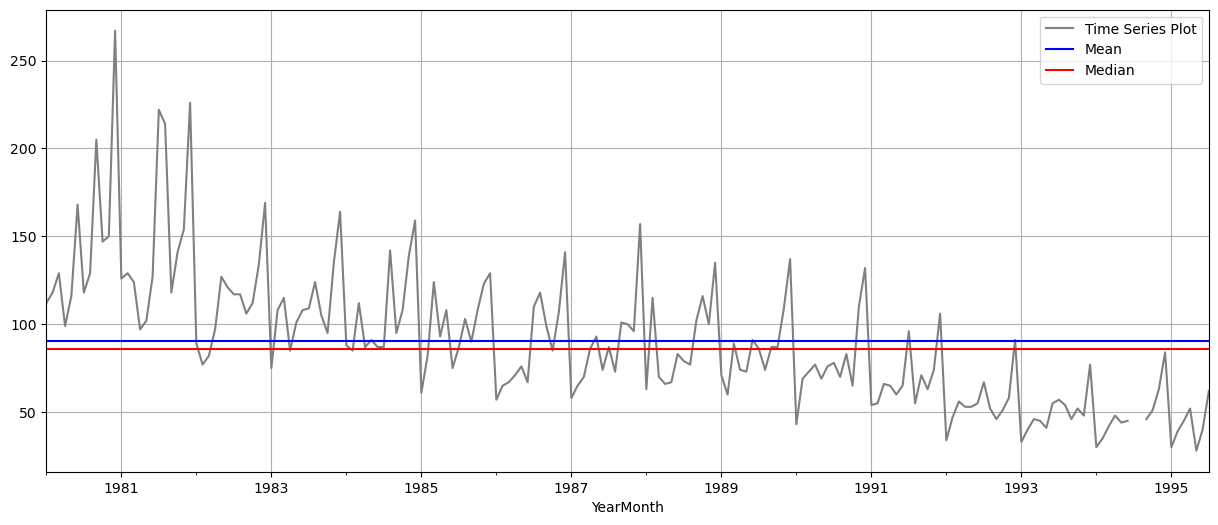

In [15]:
df.plot(color='grey')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Red')
plt.grid();
plt.legend(['Time Series Plot','Mean','Median']);

In [16]:
df.isnull().sum()

Rose    2
dtype: int64

In [17]:
df['Rose'] = df['Rose'].fillna(df['Rose'].interpolate())

In [18]:
df.isnull().sum()

Rose    0
dtype: int64

### 1.4 Perform Decomposition

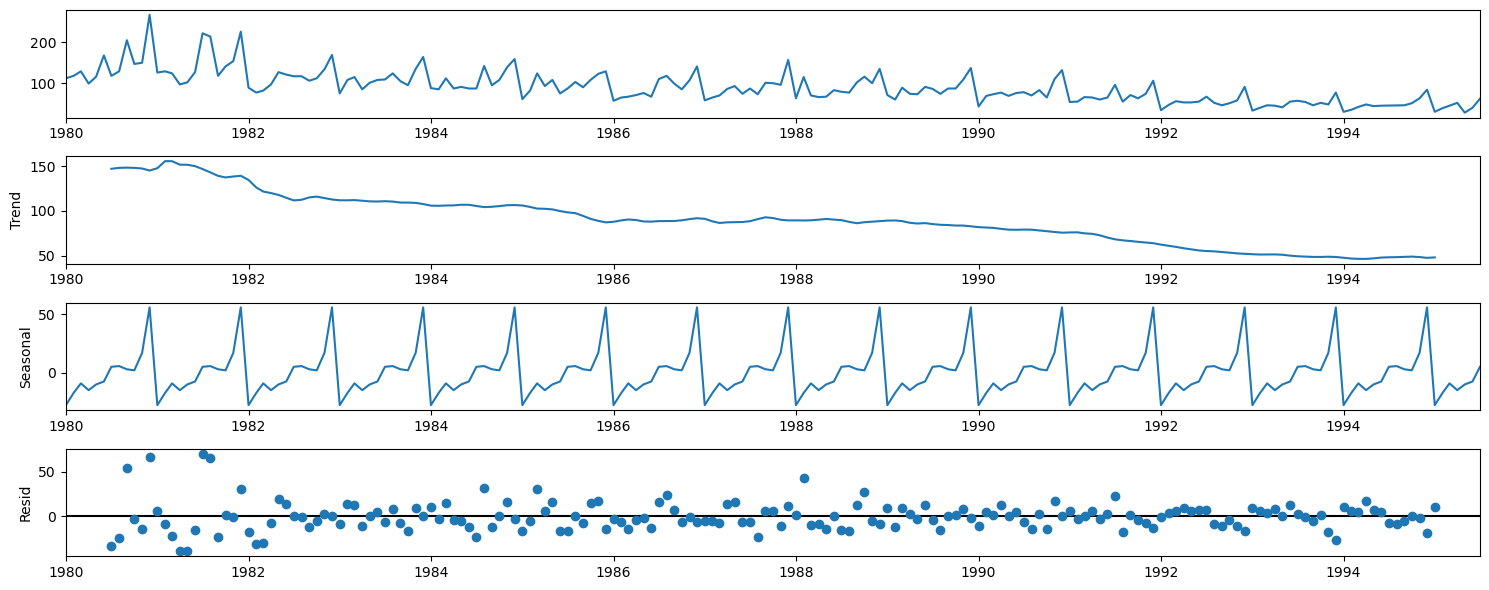

In [19]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

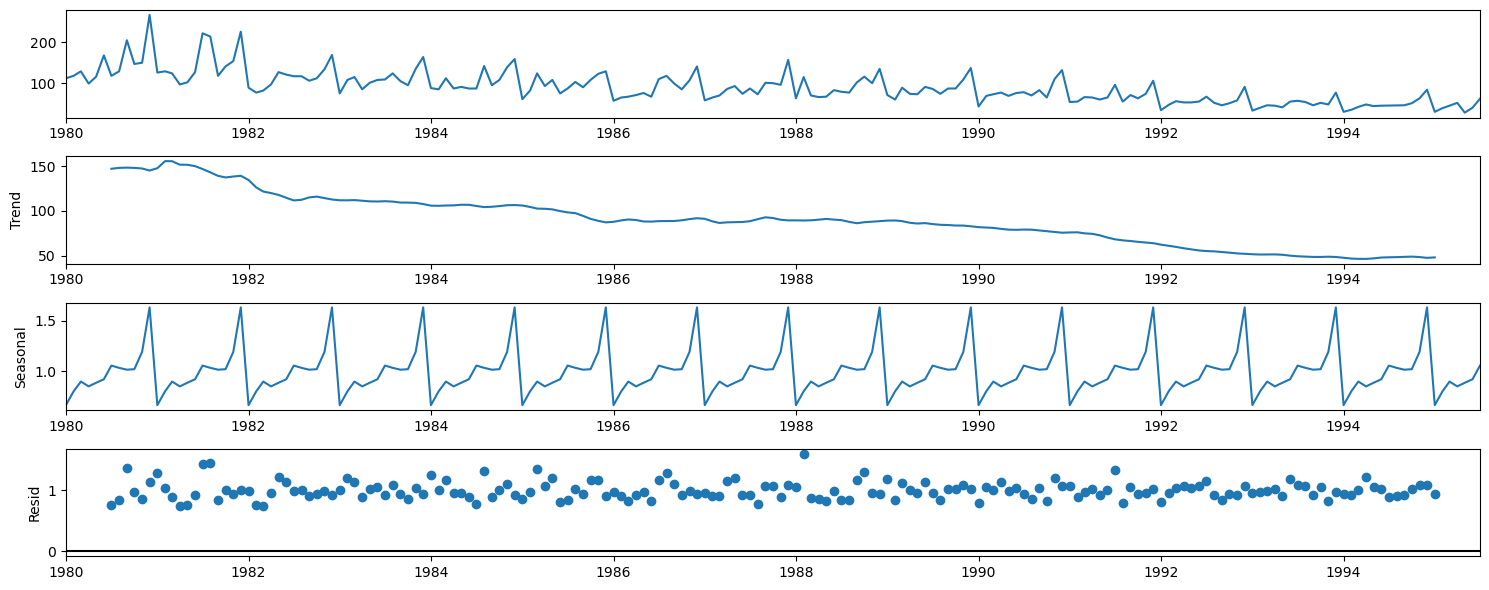

In [20]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [21]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

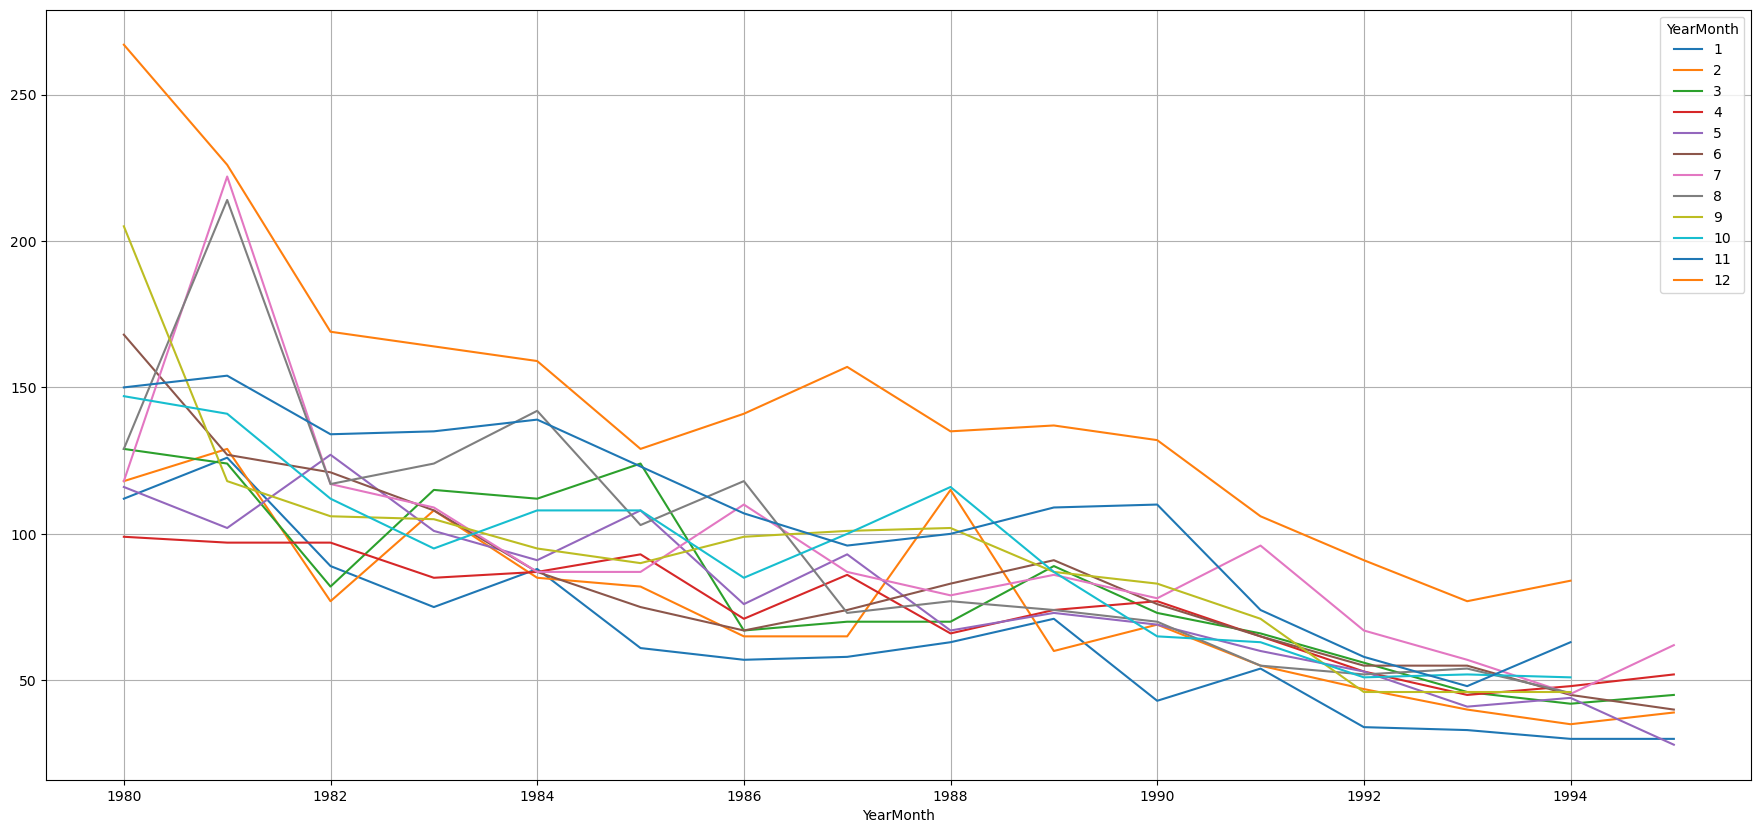

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sales_across_years.plot(ax=ax)
plt.grid();

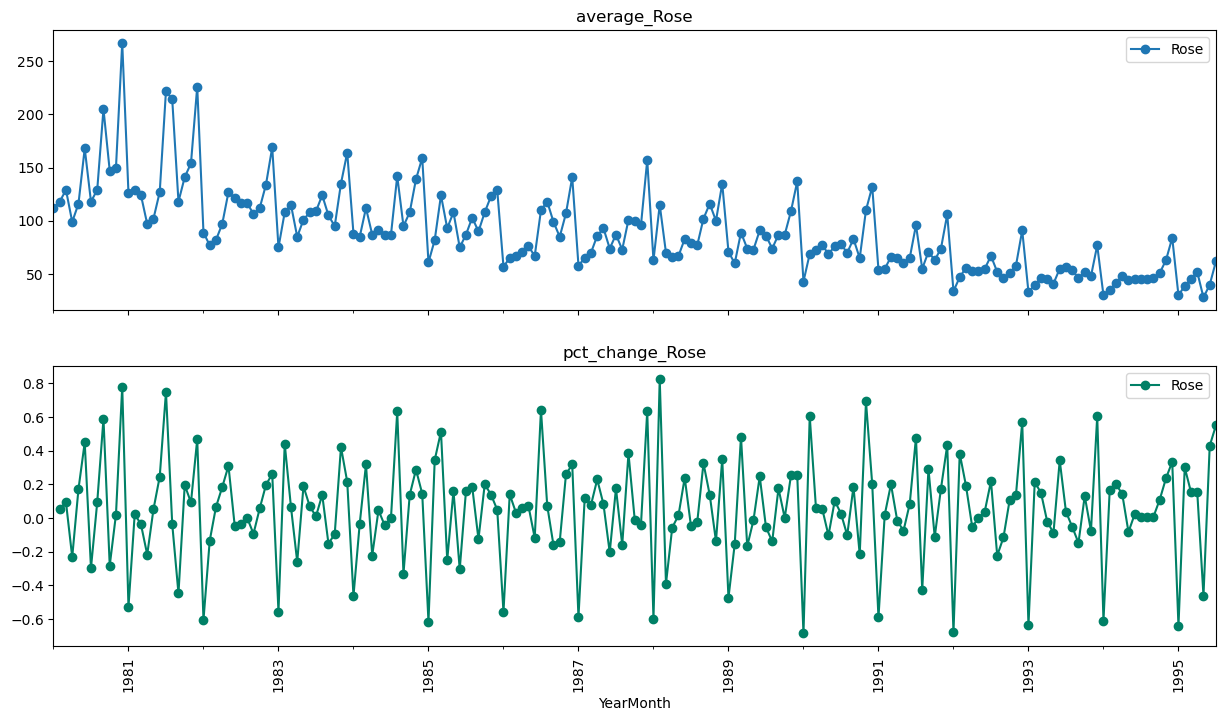

In [23]:
# group by date and get average sales, and precent change

average_Sparkling    = df.groupby(df.index)["Rose"].mean()
pct_change_Sparkling = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling sales over time(year-month)

ax1 = average_Sparkling.plot(legend=True,ax=axis1,marker='o',title="average_Rose")

ax1.set_xticks(range(len(average_Sparkling)))
ax1.set_xticklabels(average_Sparkling.index.tolist(), rotation=90)

# plot precent change for Sparkling sales over time(year-month)

ax2 = pct_change_Sparkling.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_Rose")

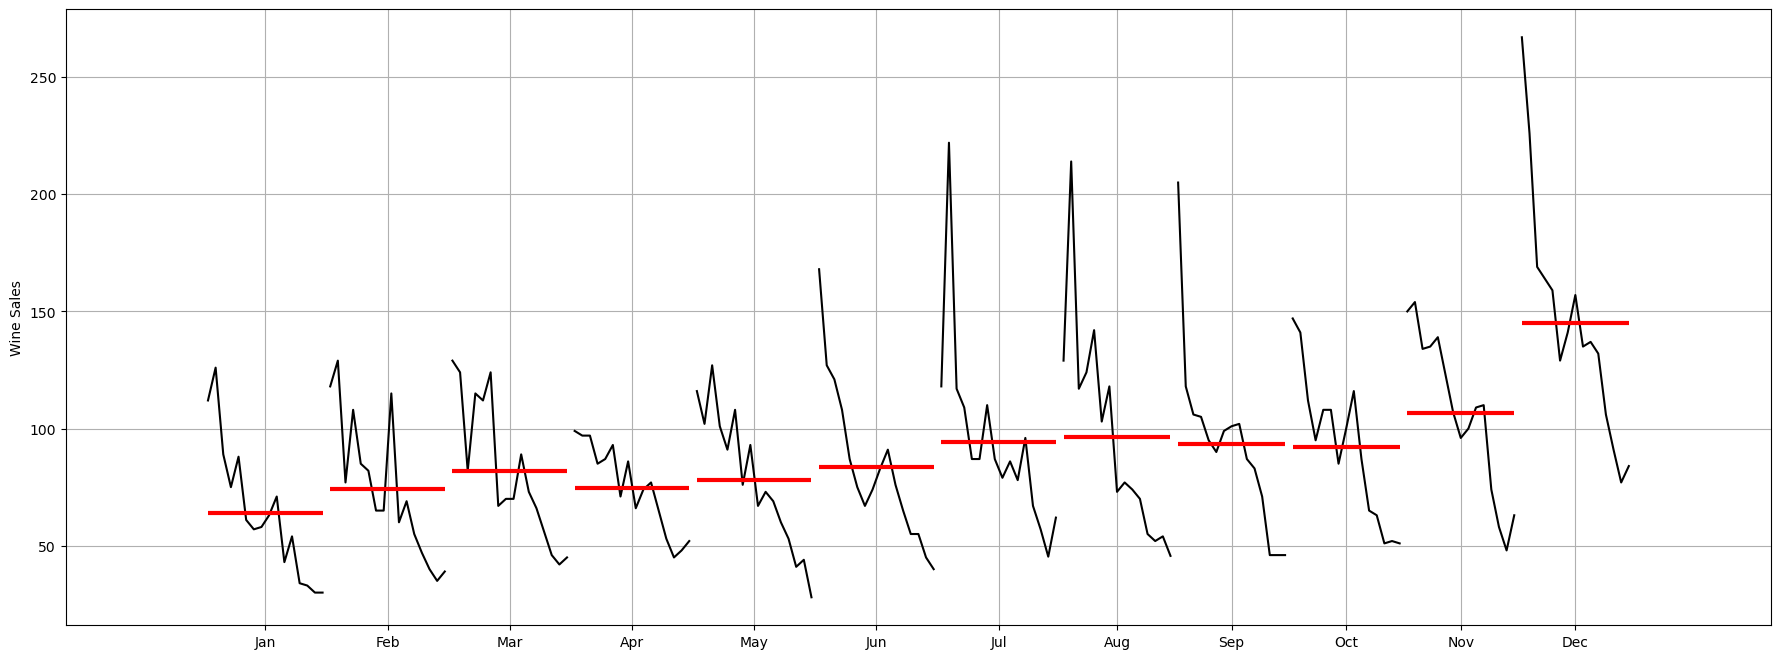

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();

## 2. Data Pre-processing

### 2.1 Missing value treatment 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [26]:
# Missing values are treated before decomposition

### 2.2 Visualize the processed data 

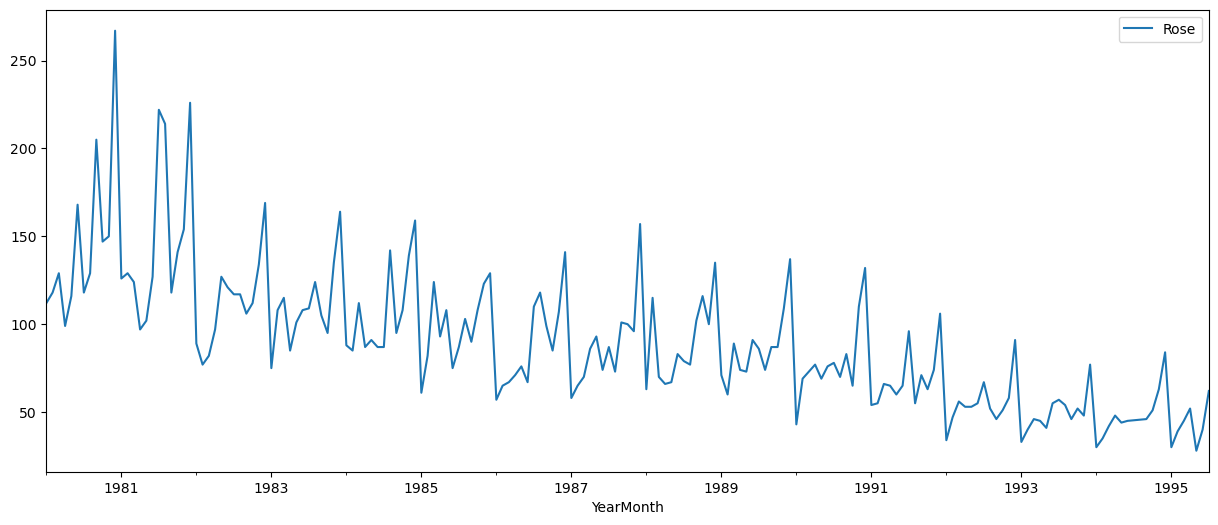

In [27]:
df.plot();

### 2.3 Train-test split

In [28]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [29]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


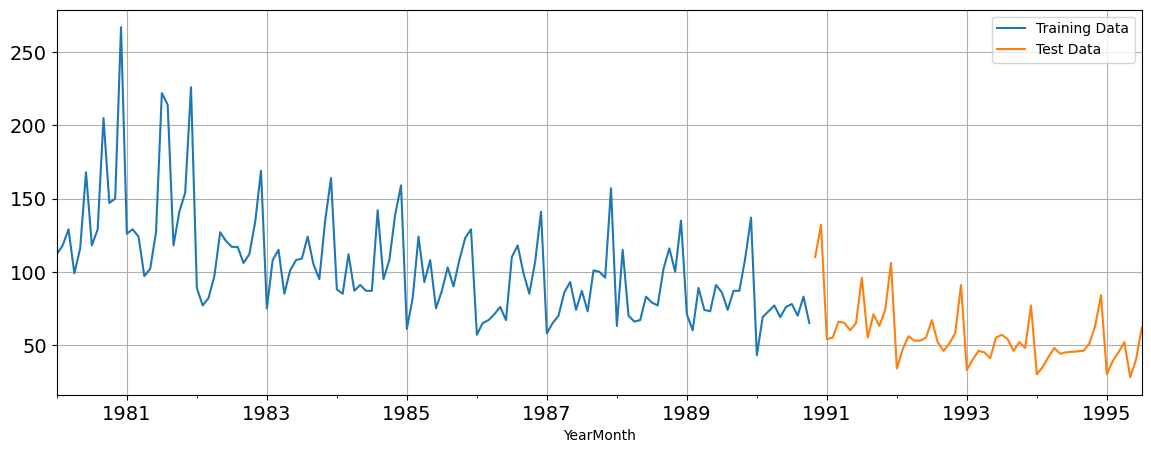

In [30]:
train['Rose'].plot(figsize=(14,5), fontsize=14)
test['Rose'].plot(figsize=(14,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 3. Model Building - Original Data

### 3.1 Build forecasting models 

### 3.1.1 Linear regression 

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
             Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130 

First few rows of Test Data 
              Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
LR = LinearRegression()
LR.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

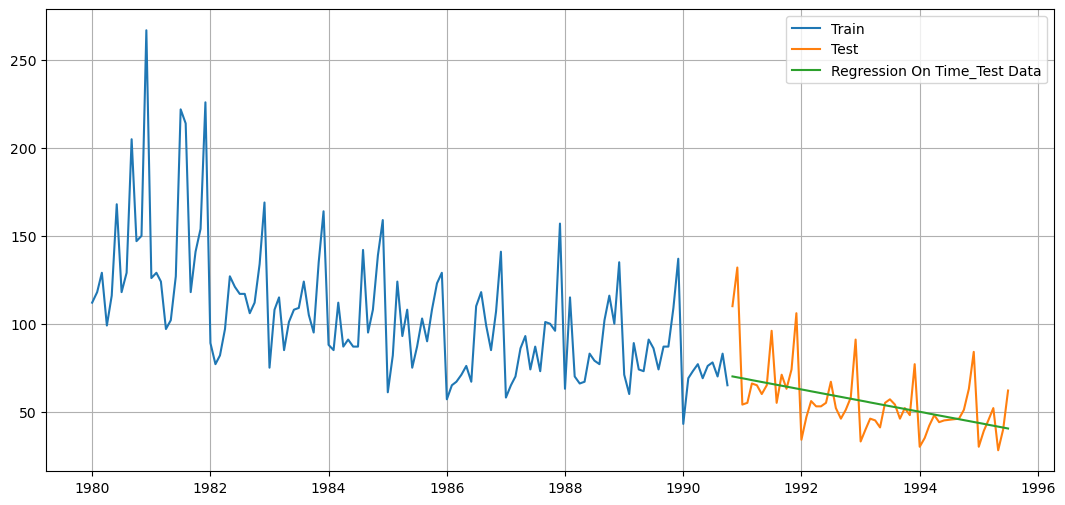

In [36]:
test_predictions_model1            = LR.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1


plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [37]:
from sklearn import metrics

Model Evaluation

In [38]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.36


In [39]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  17.355796

### 3.3 Simple Average 

In [40]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose    forecast
YearMonth                    
1990-11-01  110.0  104.692308
1990-12-01  132.0  104.692308
1991-01-01   54.0  104.692308
1991-02-01   55.0  104.692308
1991-03-01   66.0  104.692308

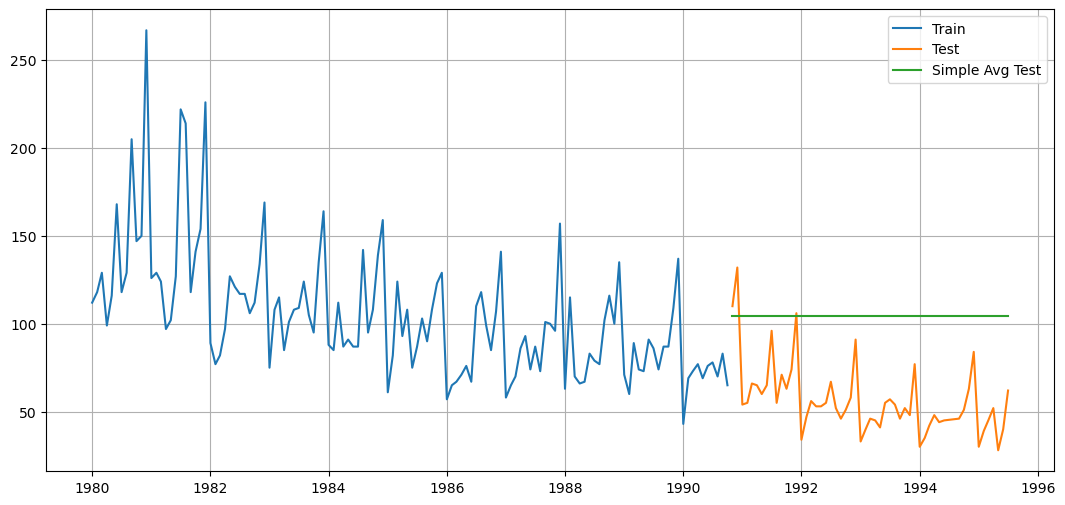

In [41]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SimpleAverage_test['forecast'], label='Simple Avg Test')
plt.legend(loc='best')
plt.grid();

### 3.4 Moving Average 

In [42]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Trailing moving averages

In [43]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
...           ...         ...         ...         ...         ...
1995-03-01   45.0        42.0       49.50   52.000000   49.888889
1995-04-01   52.0        48.5       41.50   52.166667   50.629630
1995-05-01   28.0        40.0       41.00   46.333333   48.666667
1995-06-01   40.0        34.0       41.25   39.000000   48.000000
1995-07-01   62.0        51.0       45.50   44.333333   49.222222

[187 rows x 5 columns]

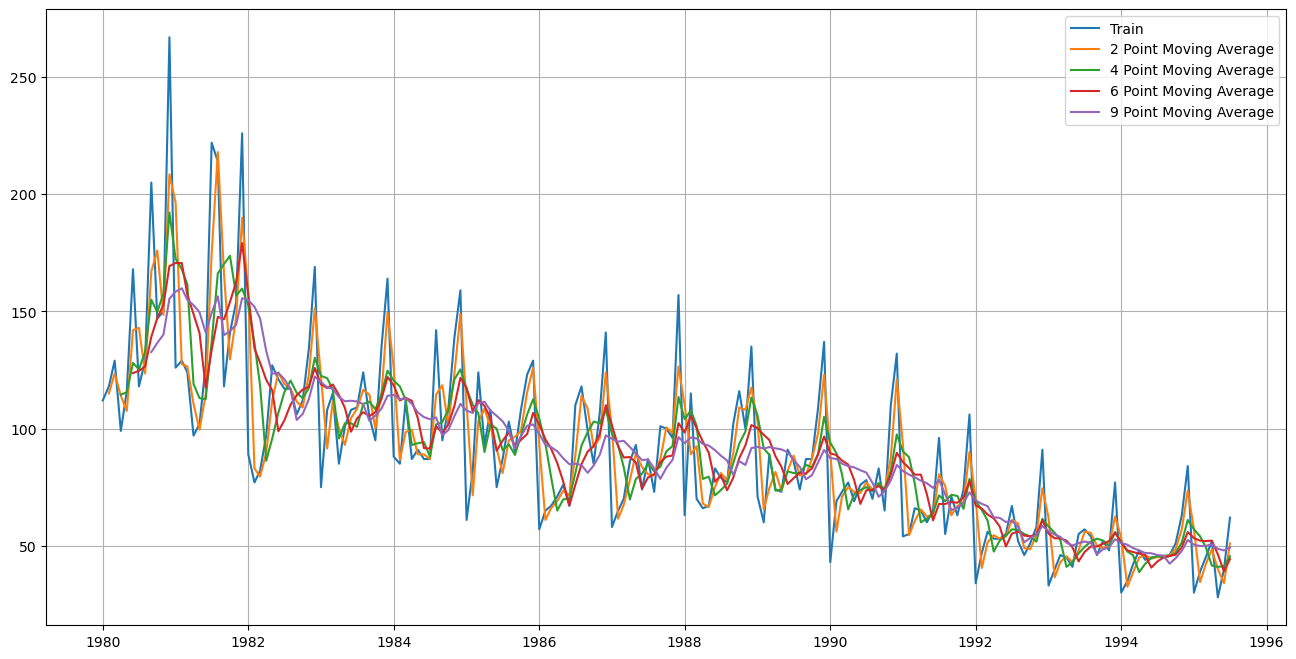

In [44]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [45]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

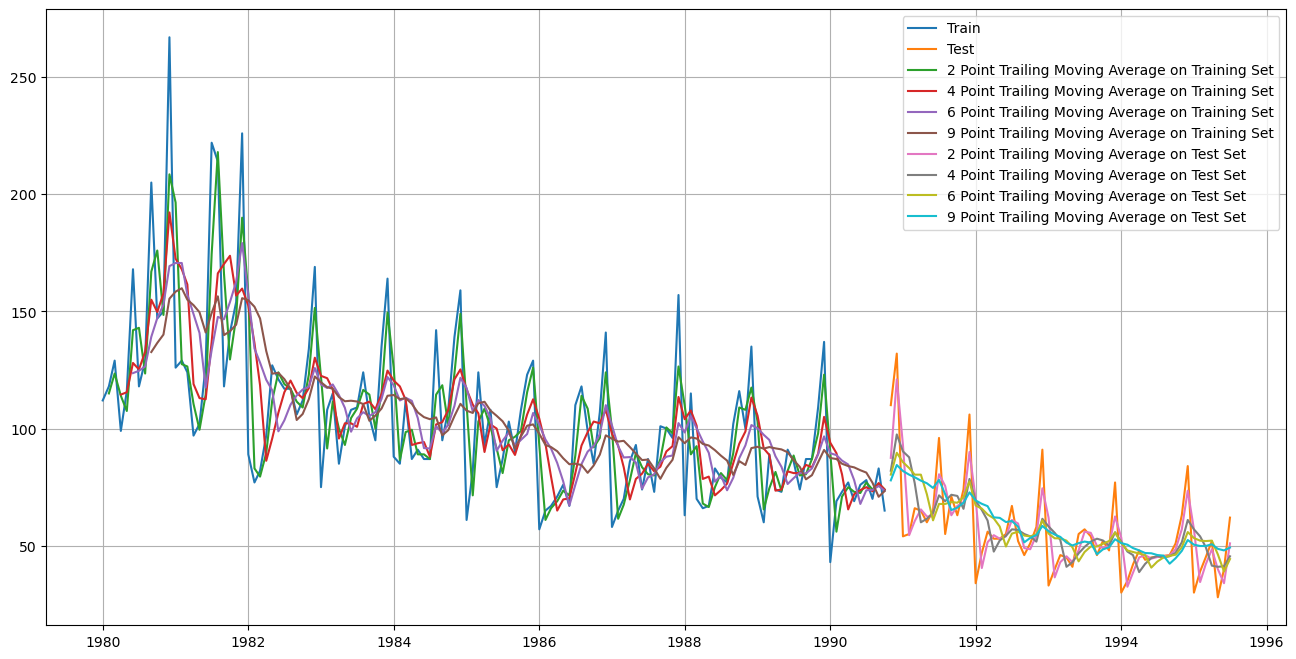

In [46]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

Model Evaluation

RMSE Calculation as below

In [47]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.342 


In [48]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             17.355796
2pointTrailingMovingAverage  11.801043
4pointTrailingMovingAverage  15.367212
6pointTrailingMovingAverage  15.862350
9pointTrailingMovingAverage  16.341919

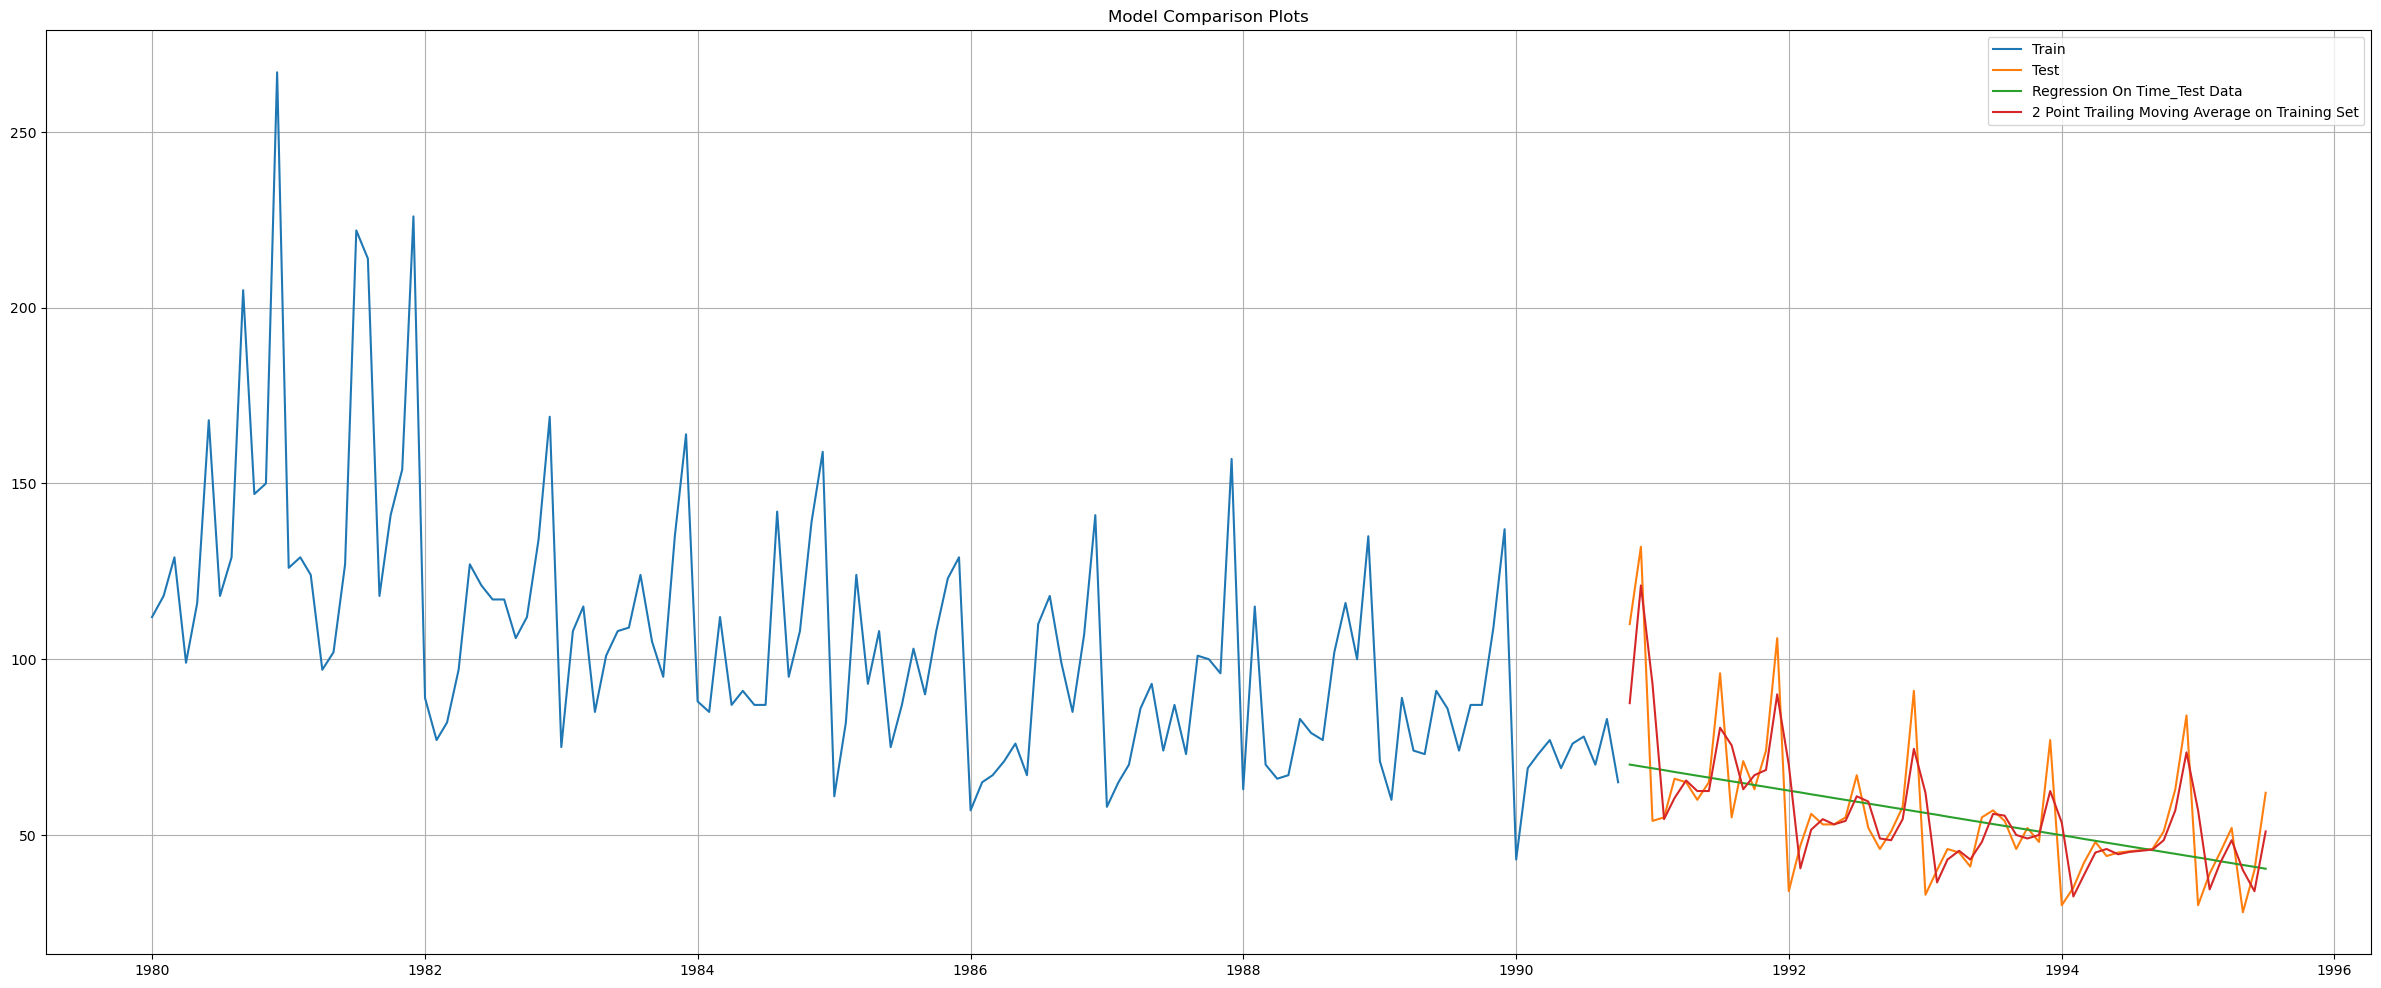

In [49]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### 3.5 Exponential Models (Single, Double, Triple) 

### 3.5.1 Single Exponential Smoothing

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [51]:
SES_train = train.copy()
SES_test = test.copy()

In [52]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
model_SES_autofit = model_SES.fit(optimized=True)

In [54]:
model_SES_autofit.params

{'smoothing_level': 0.1027210902642377,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26272138895413,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose   predict
YearMonth                  
1990-11-01  110.0  78.89952
1990-12-01  132.0  78.89952
1991-01-01   54.0  78.89952
1991-02-01   55.0  78.89952
1991-03-01   66.0  78.89952

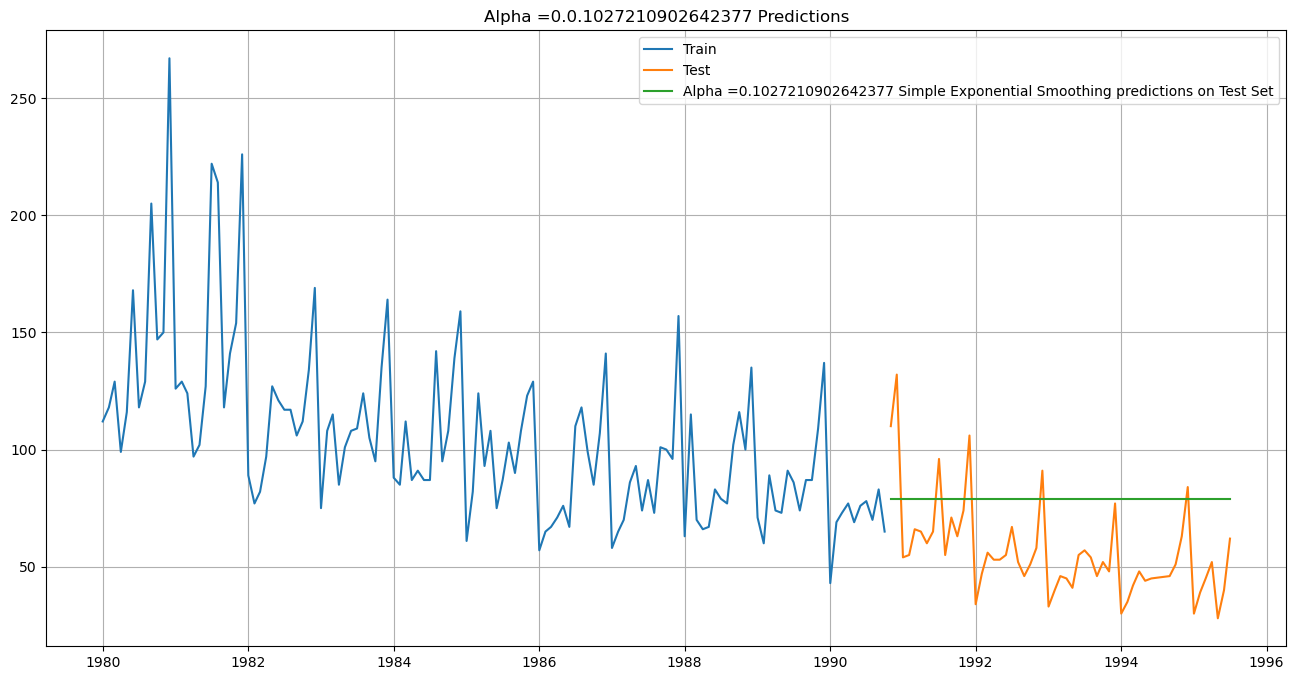

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.1027210902642377 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0.1027210902642377 Predictions');

Model Evaluation for  𝛼  = 0.1027210902642377 : Simple Exponential Smoothing

In [57]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.1027210902642377 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.1027210902642377 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 30.188


In [58]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.1027210902642377,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                                    17.355796
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [59]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [60]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/219277140.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/219277140.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/219277140.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/219277140.py:10: FutureWarning: 

Model Evaluation

In [61]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
8           0.9   37.507371  22.496819
7           0.8   36.330954  23.212777
6           0.7   35.288467  23.894929
5           0.6   34.372651  24.529811
4           0.5   33.578304  25.109604
3           0.4   32.893017  25.657764
2           0.3   32.292266  26.310348
1           0.2   31.779467  27.482131
0           0.1   31.643829  30.310589

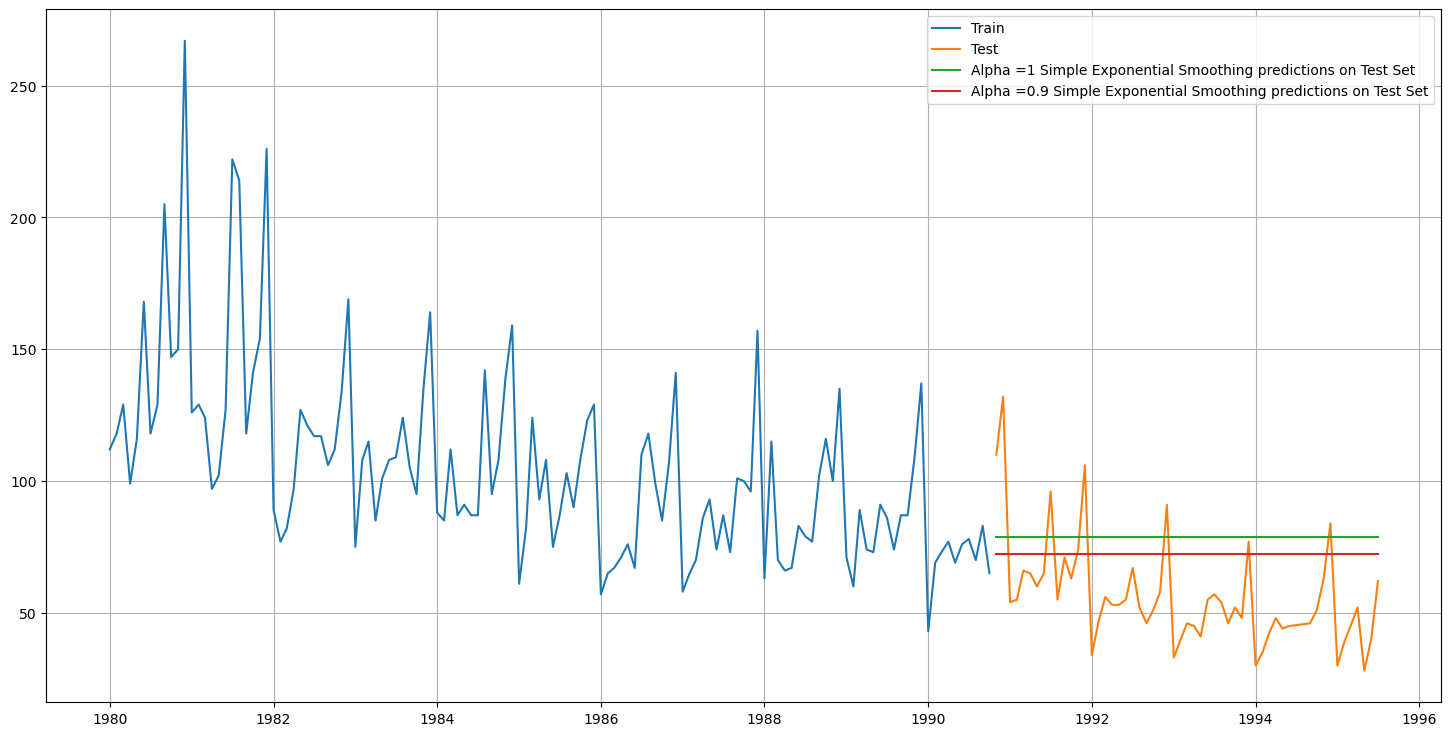

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [63]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.9,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                    17.355796
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322
Alpha=0.9,SimpleExponentialSmoothing                22.496819

### 3.5.2 Double Exponential Smoothing

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [64]:
DES_train = train.copy()
DES_test = test.copy()

In [65]:
model_DES = Holt(DES_train['Rose'])

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [67]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1632693839.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1632693839.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1632693839.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipy

In [68]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.792345   26.531373
1            0.3          0.4   37.287813   18.343250
2            0.3          0.5   38.841090   26.672378
3            0.3          0.6   40.299159   59.403849
4            0.3          0.7   41.486887   95.600325
..           ...          ...         ...         ...
59           1.0          0.6   52.018949  264.855344
60           1.0          0.7   54.697098  331.622574
61           1.0          0.8   57.575818  406.506557
62           1.0          0.9   60.691028  491.247514
63           1.0          1.0   64.093561  587.897332

[64 rows x 4 columns]

In [69]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
1            0.3          0.4   37.287813  18.343250
12           0.4          0.7   40.744796  18.975318
9            0.4          0.4   37.990913  19.133156
17           0.5          0.4   38.598226  19.197151
8            0.4          0.3   36.682435  19.769770

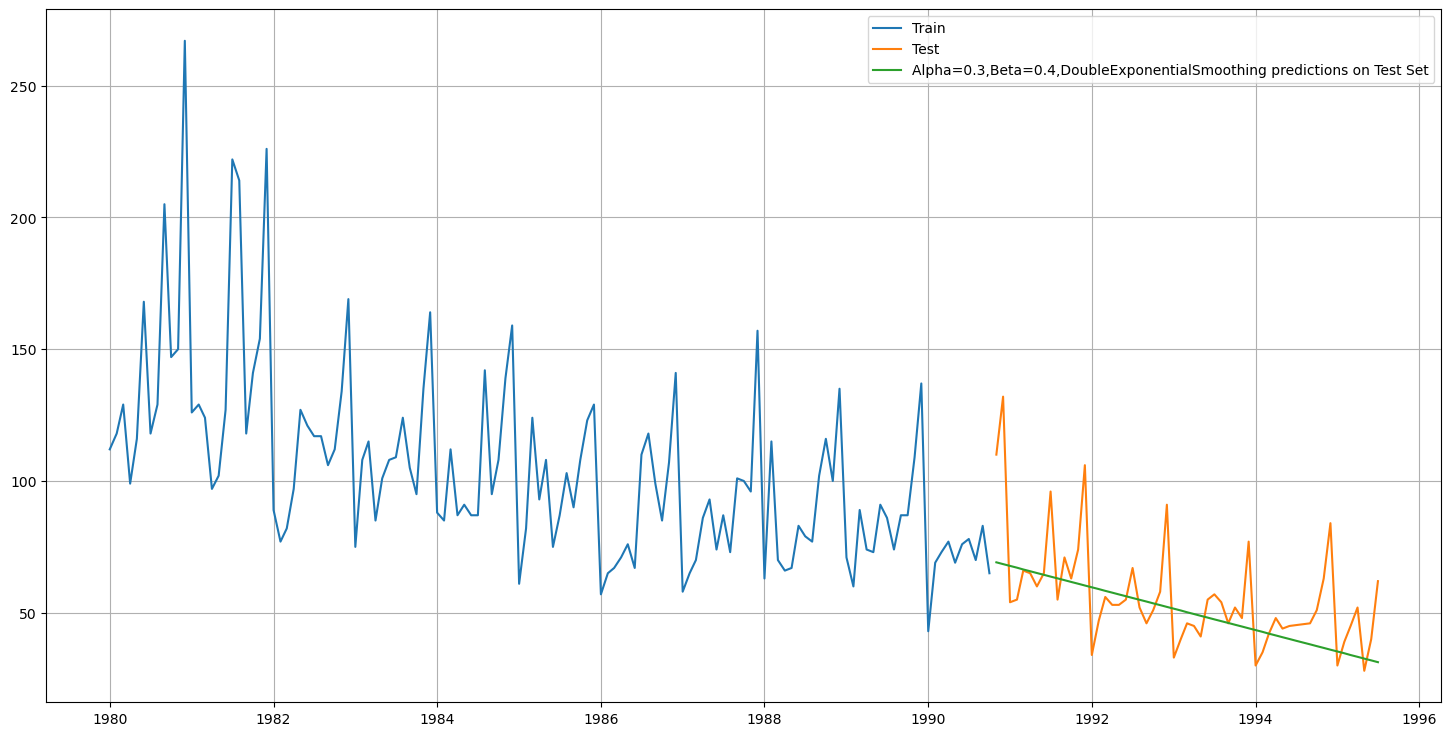

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.4], label='Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [71]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    17.355796
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250

### 3.5.3 Triple Exponential Smoothing

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [72]:
TES_train = train.copy()
TES_test = test.copy()

In [73]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
model_TES_autofit = model_TES.fit()

In [75]:
model_TES_autofit.params

{'smoothing_level': 0.0999080139189177,
 'smoothing_trend': 1.9932826568022853e-06,
 'smoothing_seasonal': 0.00017683239767298466,
 'damping_trend': nan,
 'initial_level': 109.16836143052193,
 'initial_trend': -0.44137924420686336,
 'initial_seasons': array([1.0049411 , 1.13565754, 1.2416344 , 1.08896356, 1.2223928 ,
        1.31686195, 1.44959601, 1.55043078, 1.45169973, 1.42782318,
        1.64159637, 2.26353792]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
YearMonth                      
1990-11-01  110.0     86.291902
1990-12-01  132.0    117.979447
1991-01-01   54.0     51.933830
1991-02-01   55.0     58.193935
1991-03-01   66.0     63.075288

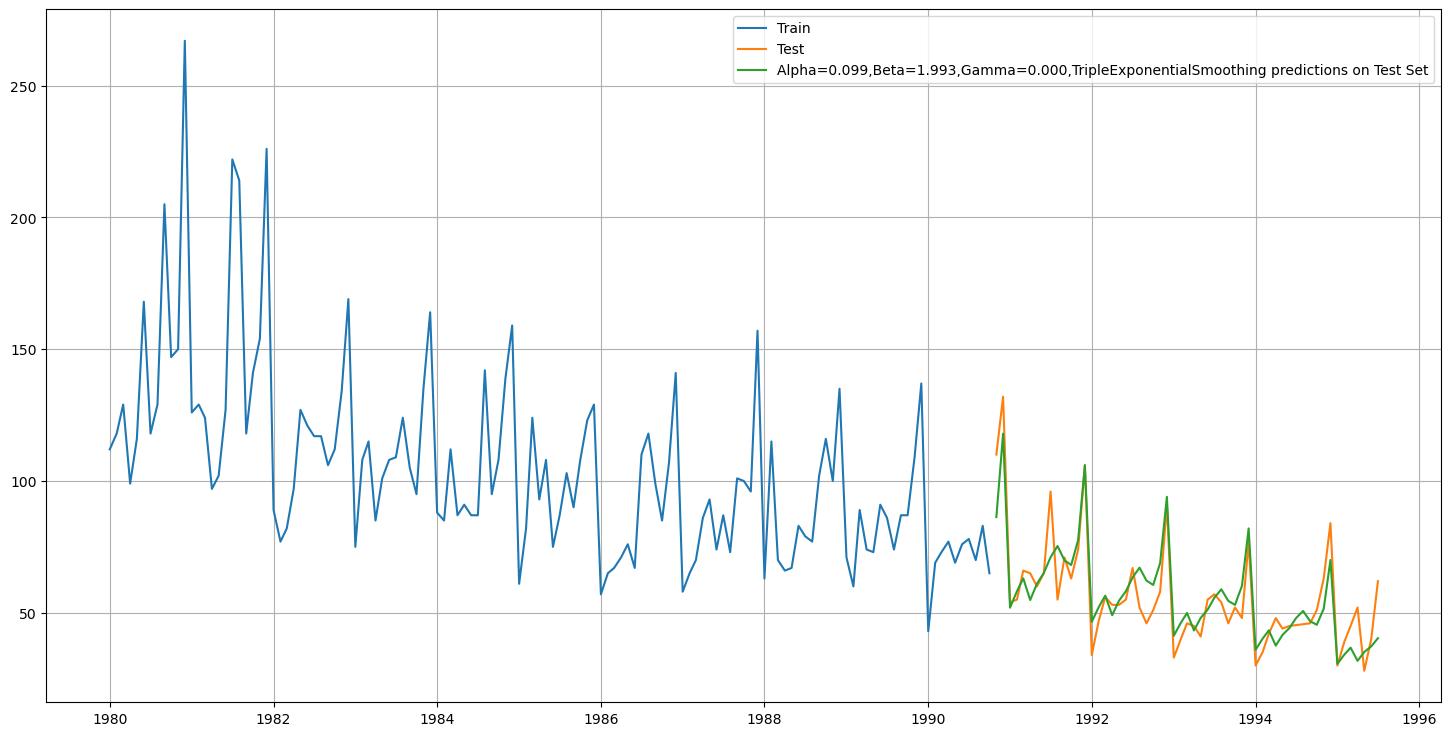

In [77]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [78]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.099,Beta=1.993,Gamma=0.000, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.099,Beta=1.993,Gamma=0.000, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 9.329


In [79]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    17.355796
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExpone...   9.328733

In [80]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [81]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/3213087545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/3213087545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/3213087545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/3213087545.py:

In [82]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1     19.589725      9.584356
1             0.1          0.1           0.2     20.134187      9.531308
2             0.1          0.1           0.3     20.793342      9.425275
3             0.1          0.1           0.4     21.552201      9.288651
4             0.1          0.1           0.5     22.415877      9.212838
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6   2156.016082   1764.935972
996           1.0          1.0           0.7   3114.343611   5623.268754
997           1.0          1.0           0.8   2455.974802   4317.157984
998           1.0          1.0           0.9  29056.690525  30910.588575
999           1.0          1.0           1.0   1588.932809   8368.146310

[1000 rows x 5 columns]

In [83]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
91            0.1          1.0           0.2   23.140673   9.129075
4             0.1          0.1           0.5   22.415877   9.212838
5             0.1          0.1           0.6   23.396696   9.282132
3             0.1          0.1           0.4   21.552201   9.288651
106           0.2          0.1           0.7   25.623069   9.331747

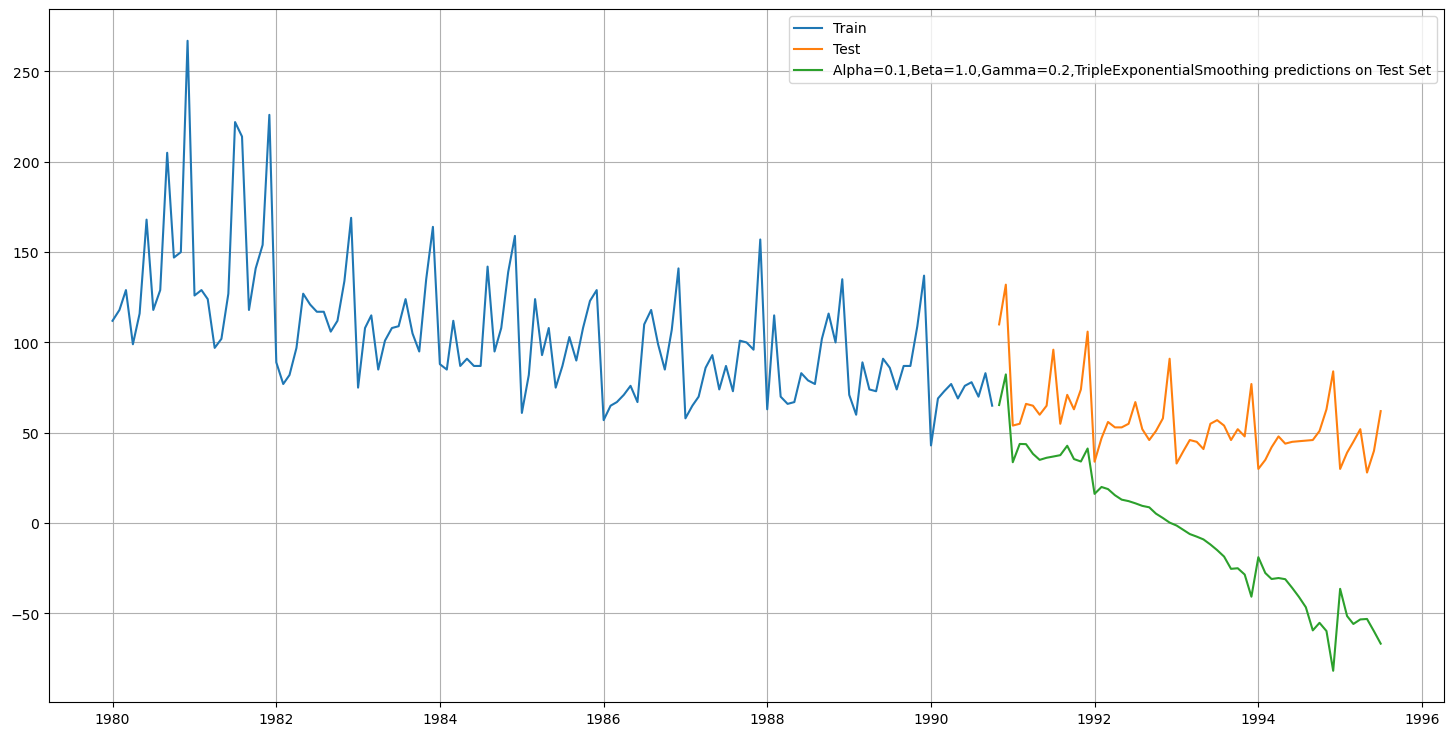

In [84]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.9, 0.1, 0.2], label='Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [85]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
Model11 = resultsDf

Model11

Test RMSE
RegressionOnTime                                    17.355796
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExpone...   9.328733
Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialS...   9.129075

In [86]:
print('Sorted by RMSE values on the Test Data:','\n',)
Model11.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialS...   9.129075
Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExpone...   9.328733
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
RegressionOnTime                                    17.355796
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.9,  𝛽  = 0.1 and  𝛾  = 0.2

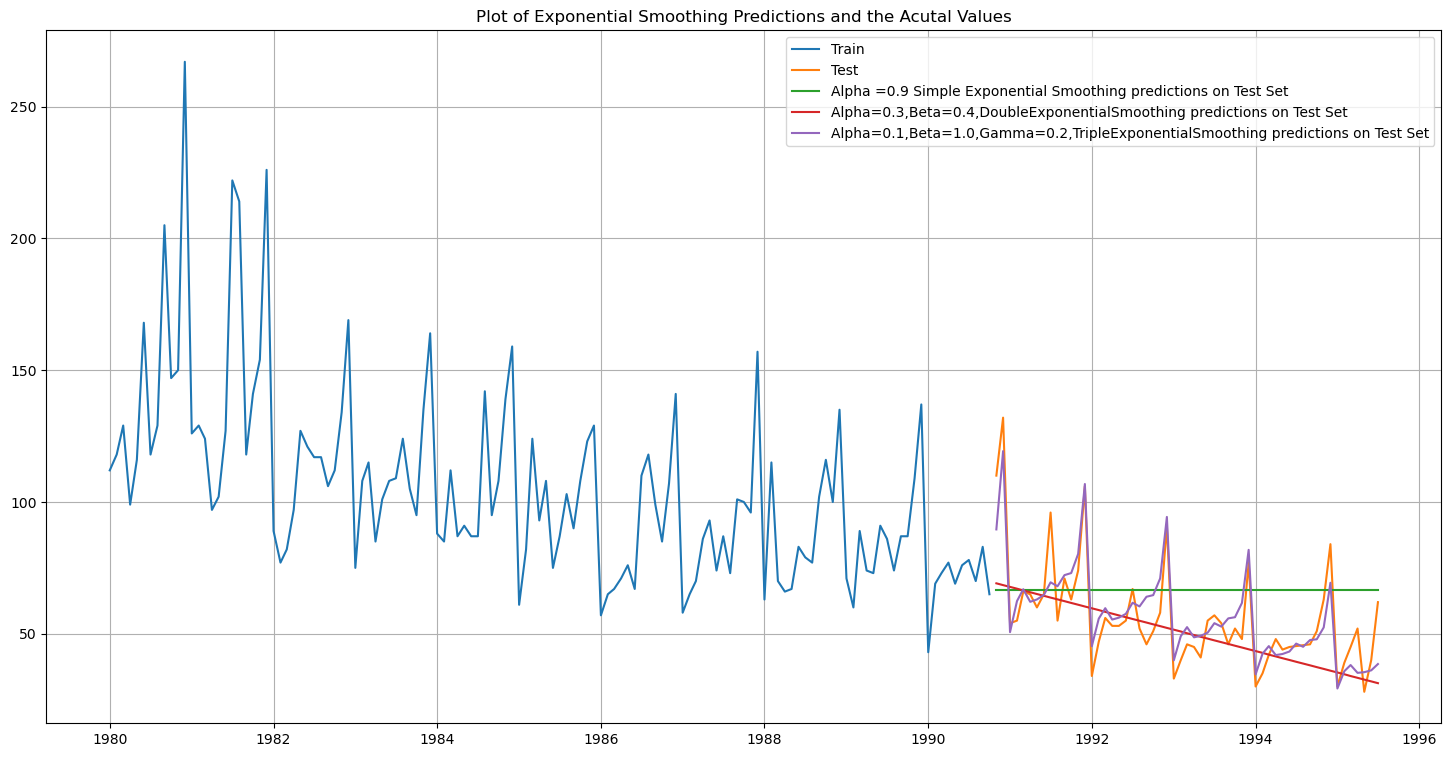

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.4], label='Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 1.0, 0.2], label='Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

Full Model

In [88]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=1.0,
                                                                 smoothing_seasonal=0.2)

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 19.47794358086265


In [90]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

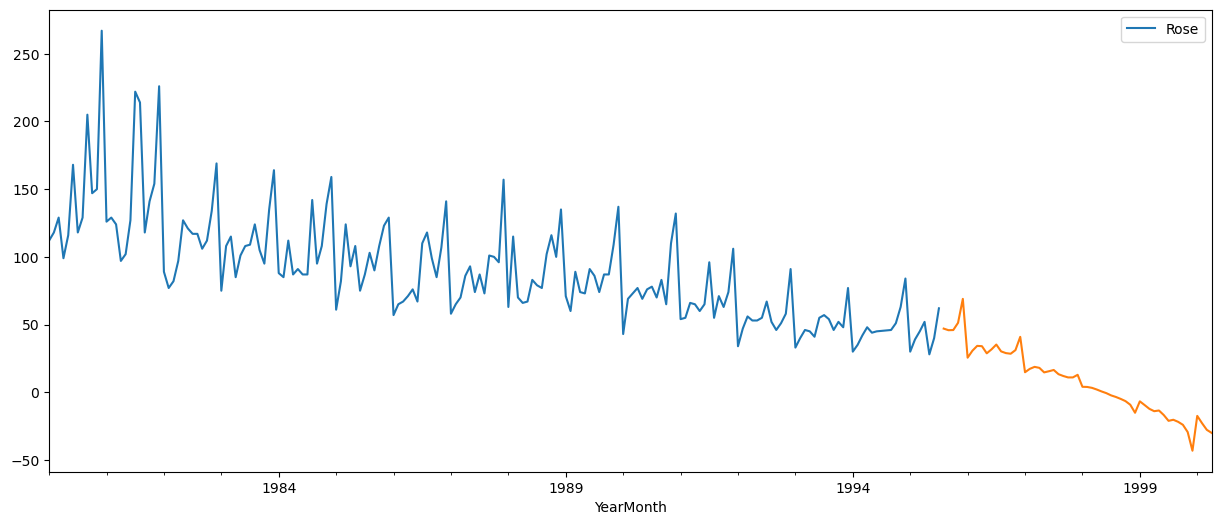

In [91]:
df.plot()
prediction_2.plot();

In [92]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction    upper_ci
1995-08-01   8.742476   47.019262   85.296048
1995-09-01   7.562921   45.839707   84.116493
1995-10-01   7.681913   45.958699   84.235485
1995-11-01  13.026824   51.303610   89.580396
1995-12-01  30.694471   68.971257  107.248043

In [93]:
pred_2_df.tail()

lower_CI  prediction   upper_ci
1999-12-01 -81.438896  -43.162110  -4.885324
2000-01-01 -55.718198  -17.441412  20.835374
2000-02-01 -61.098043  -22.821257  15.455529
2000-03-01 -66.019526  -27.742740  10.534046
2000-04-01 -68.244240  -29.967453   8.309333

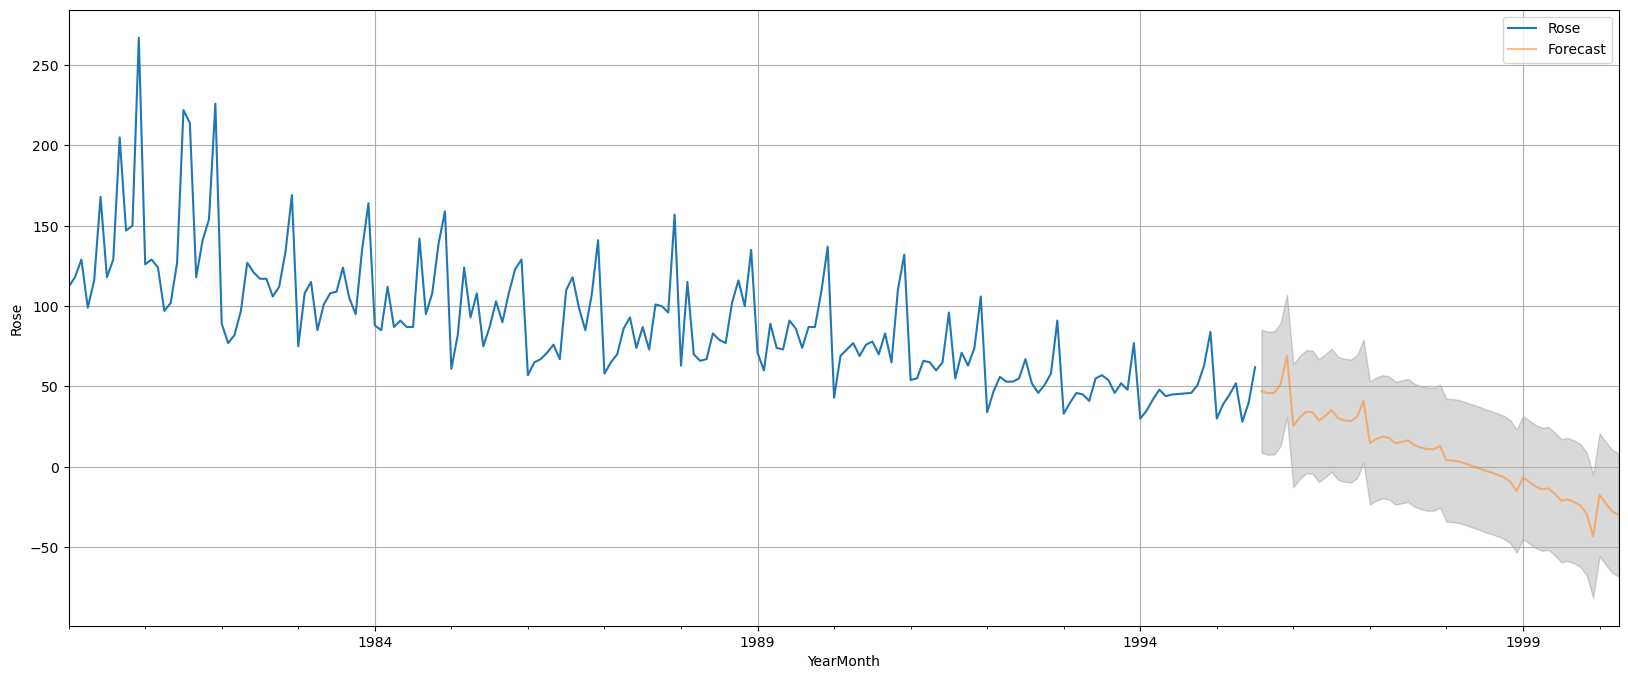

In [94]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(20,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

### 3.6 Check the performance of the models built

In [95]:
print('Sorted by RMSE values on the Test Data:','\n',)
Model11.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialS...   9.129075
Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExpone...   9.328733
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
RegressionOnTime                                    17.355796
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322

Across all the models built the TES with best params Alpha – 0.1,  Beta – 1.0 & Gamma – 0.2 value has the lowest RMSE value



## 4. Check for Stationarity

### 4.1 Check for stationarity 

AD Fuller Test
if p value > 0.05 then We fail to reject null hypothesis (H0 is true). 
We go for differencing
if p value < 0.05 then the data is stationary

In [96]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

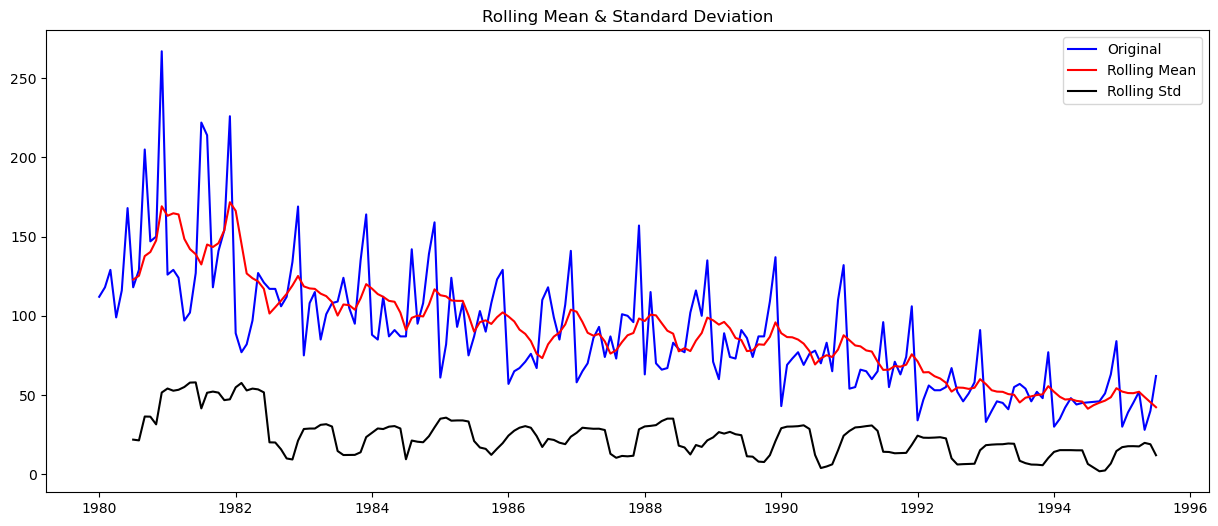

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [97]:
test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

### 4.2 Make the data stationary (if needed)

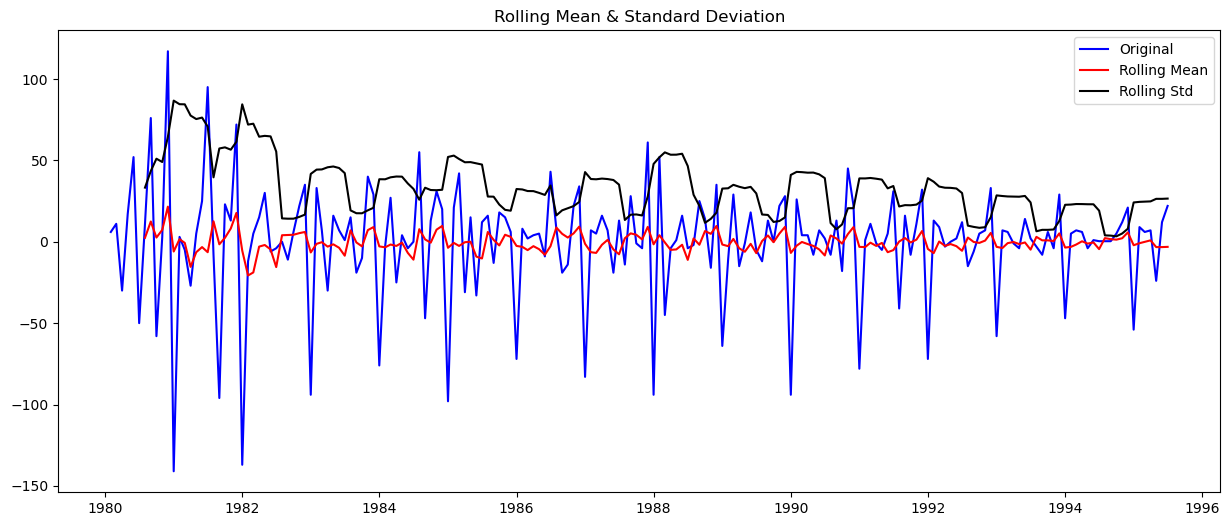

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [98]:
test_stationarity(df['Rose'].diff().dropna())

## 5. Model Building - Stationary Data

### 5.1 Generate ACF & PACF Plot and find the AR, MA values. 

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

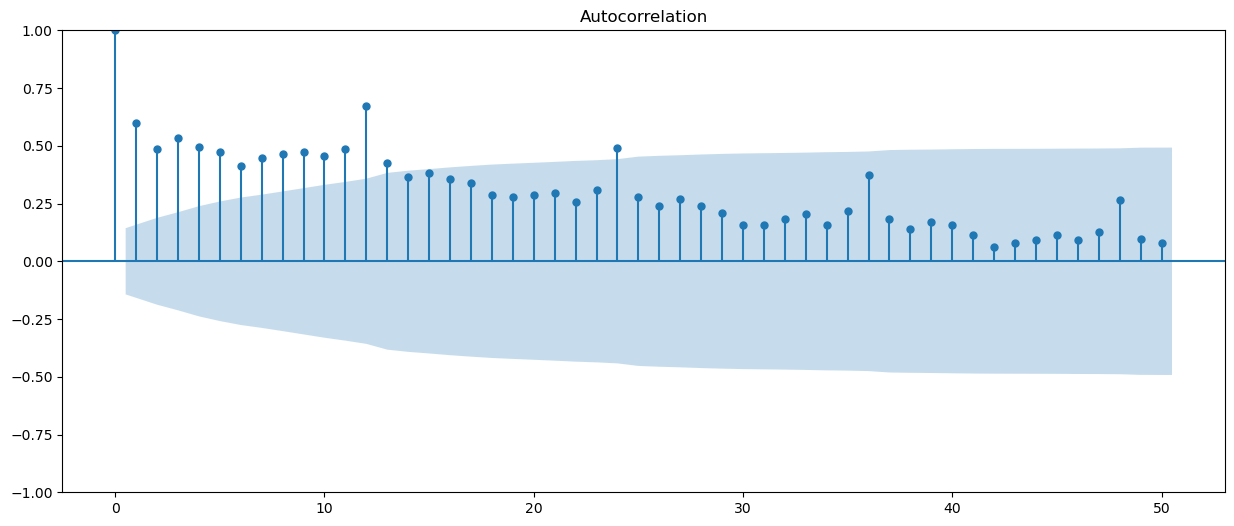

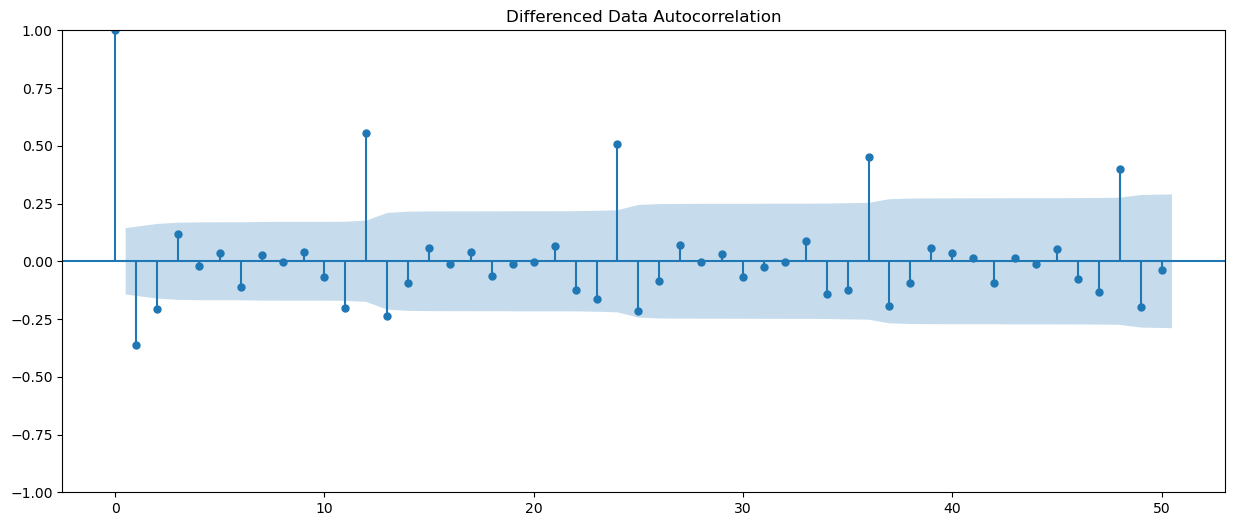

In [100]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


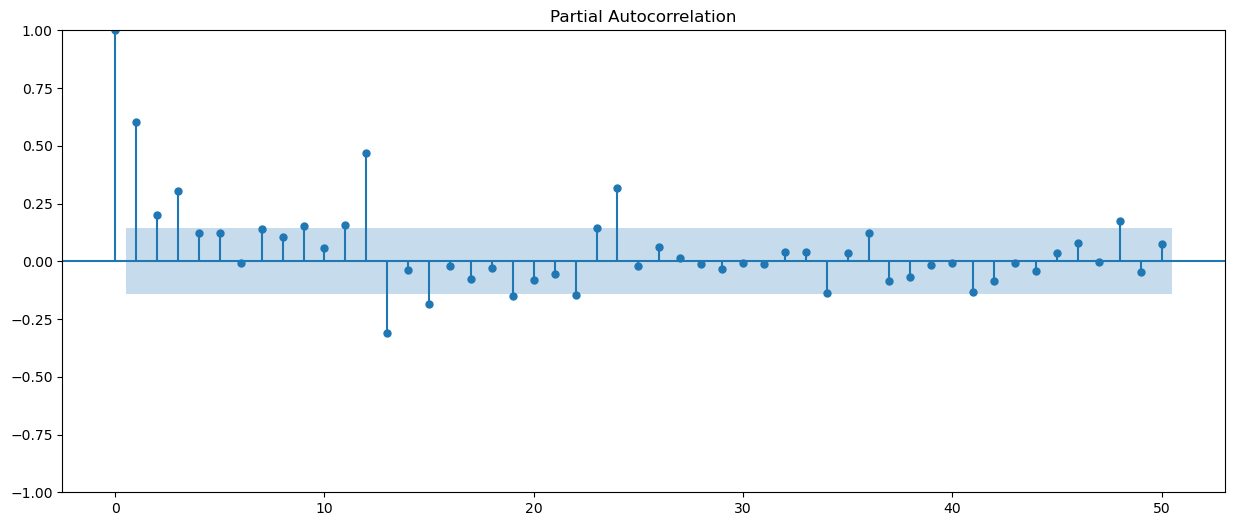

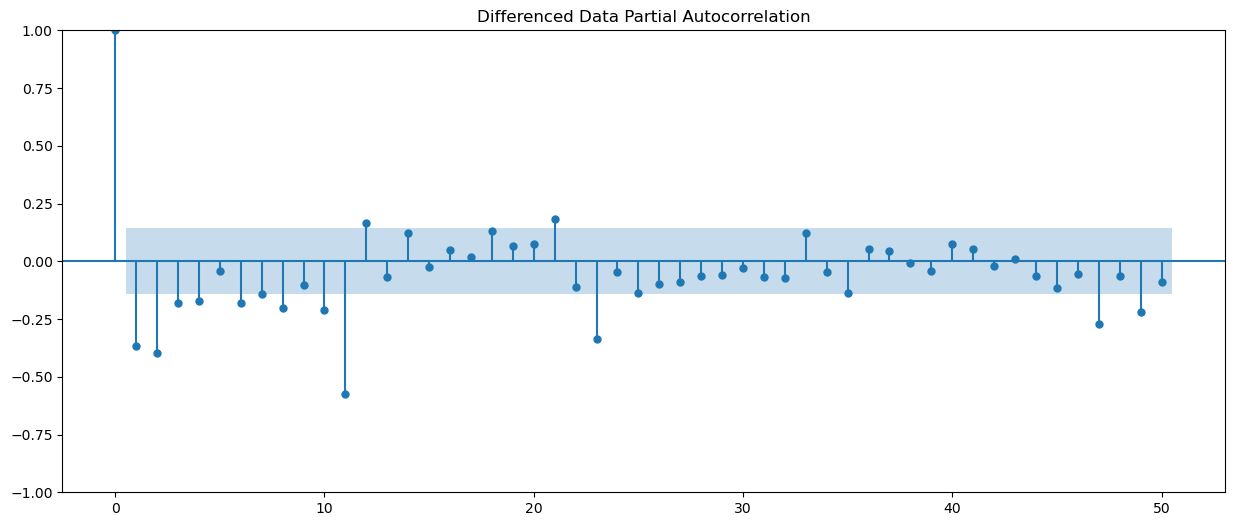

In [101]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 5.2 Build different ARIMA models

### 5.2.1 Auto ARIMA 

In [102]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [103]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [104]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1313.1758613526422
ARIMA(0, 1, 1) - AIC:1261.3274438405824
ARIMA(0, 1, 2) - AIC:1259.2477803151235


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 0) - AIC:1297.0772943848556
ARIMA(1, 1, 1) - AIC:1260.0367627035876


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:1259.47320495012
ARIMA(2, 1, 0) - AIC:1278.1352807484318


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:1261.0140762917006


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1261.472000656905


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [105]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1259.247780
5  (1, 1, 2)  1259.473205
4  (1, 1, 1)  1260.036763
7  (2, 1, 1)  1261.014076
1  (0, 1, 1)  1261.327444
8  (2, 1, 2)  1261.472001
6  (2, 1, 0)  1278.135281
3  (1, 1, 0)  1297.077294
0  (0, 1, 0)  1313.175861

In [106]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -626.624
Date:                Sun, 14 Apr 2024   AIC                           1259.248
Time:                        23:09:33   BIC                           1267.827
Sample:                    01-01-1980   HQIC                          1262.734
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

Predict on the Test Set using this model and evaluate the model.

In [107]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [108]:
predicted_auto_ARIMA.head()

1990-11-01    76.445779
1990-12-01    79.764438
1991-01-01    79.764438
1991-02-01    79.764438
1991-03-01    79.764438
Freq: MS, Name: predicted_mean, dtype: float64

In [109]:
from sklearn.metrics import  mean_squared_error

In [110]:
rmse = metrics.mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

30.90380438605208


In [111]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

RMSE
ARIMA(0,1,2)  30.903804

### 5.2.2 Manual ARIMA 

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


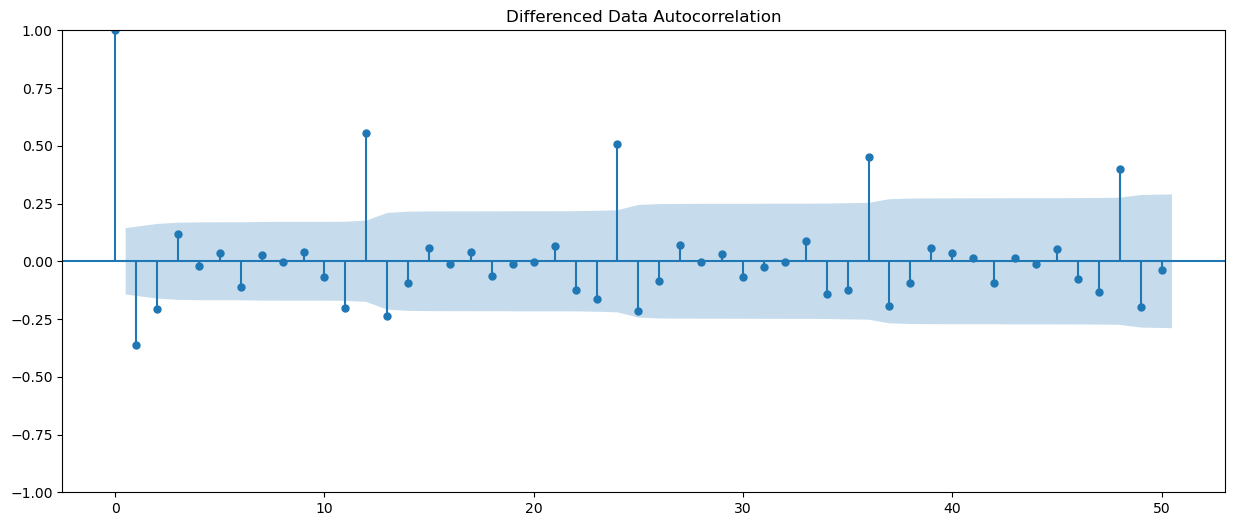

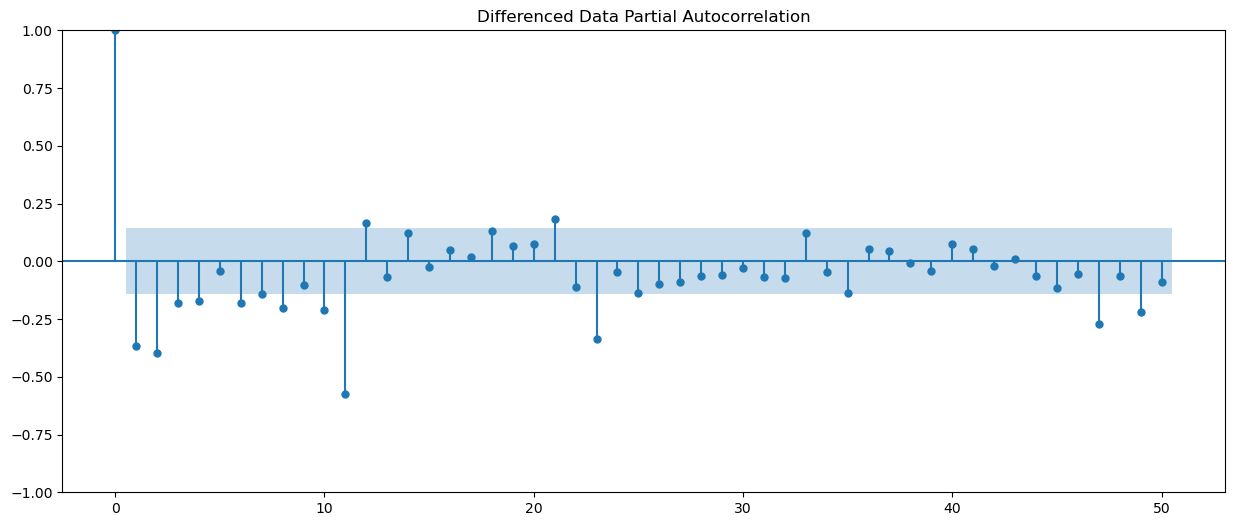

In [112]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [113]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/t

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -625.665
Date:                Sun, 14 Apr 2024   AIC                           1265.331
Time:                        23:09:34   BIC                           1285.349
Sample:                    01-01-1980   HQIC                          1273.465
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3929      0.970     -0.405      0.685      -2.294       1.508
ar.L2          0.0012      0.260      0.005      0.996      -0.508       0.511
ar.L3          0.0405      0.113      0.357      0.7

Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [115]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

30.607788315401326


In [116]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)  30.903804
ARIMA(4,1,2)  30.607788

### 5.3 Build different SARIMA models 

### 5.3.1 Auto SARIMA  

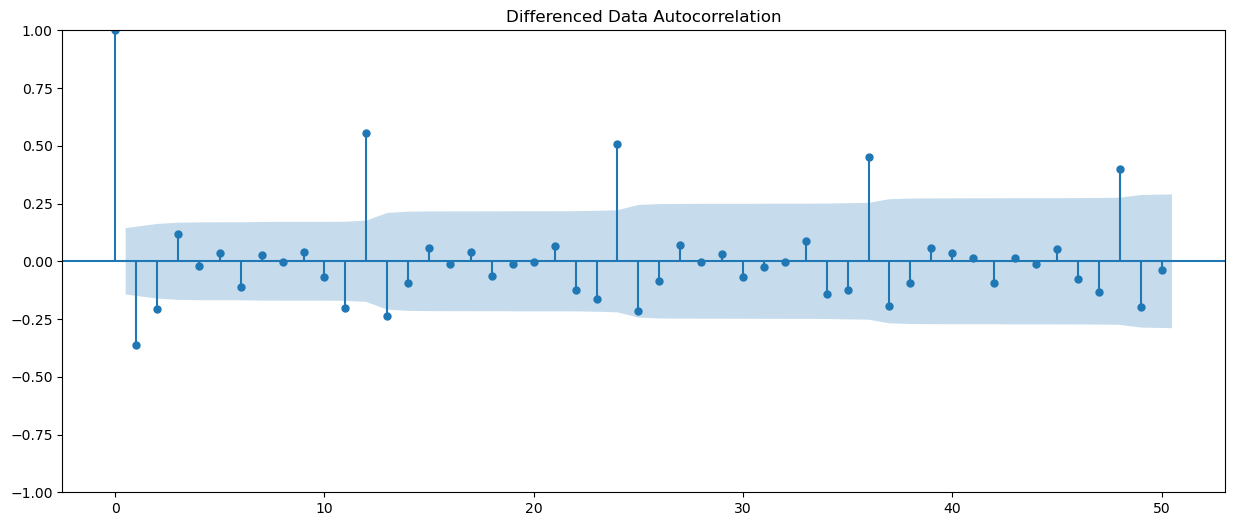

In [117]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12 as well as 24
. We will run our auto SARIMA models by setting seasonality both as 12 and 24.

Setting the seasonality as 6
for the first iteration of the auto SARIMA model

In [118]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [119]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [120]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00769D+00    |proj g|=  3.91436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.620D-07   5.008D+00
  F =   5.0076319775357376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate    5    f=  3.62586D+00    |proj g|=  1.28927D-02

At iterate   10    f=  3.62578D+00    |proj g|=  6.80463D-03

At iterate   15    f=  3.62577D+00    |proj g|=  4.45876D-04

At iterate   20    f=  3.62577D+00    |proj g|=  2.13849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   6.368D-07   3.626D+00
  F =   3.6257686527802031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497228528
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   8.213D-06   3.597D+00
  F =   3.5971380640545902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.2558966541934
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57212D+00    |proj g|=  1.48563D-01

At iterate    5    f=  3.56301D+00    |proj g|=  1.29930D-02

At iterate   10    f=  3.56279D+00    |proj g|=  1.26237D-03


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.56277D+00    |proj g|=  8.86579D-03

At iterate   20    f=  3.56275D+00    |proj g|=  4.19051D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   4.191D-05   3.563D+00
  F =   3.5627495721276259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.3148887531827
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81730D+00    |proj g|=  1.85087D-01

At iterate    5

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate   15    f=  4.13088D+00    |proj g|=  1.61866D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   6.140D-06   4.131D+00
  F =   4.1307046942102019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1079.9832204946524
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69658D+00    |proj g|=  8.88118D-02

At iterate    5    f=  3.66669D+00    |proj g|=  1.62740D-02

At iterate   1

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  4.12396D+00    |proj g|=  9.21490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     25      1     0     0   2.326D-06   4.124D+00
  F =   4.1239558371362905     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1078.2285176554356
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15985D+00    |proj g|=  1.01295D-01

At iterate    5    f=  4.13128D+00    |proj g|=  4.42859D-02

At iterate   1

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.43054D+00    |proj g|=  4.18210D-02

At iterate   20    f=  3.42942D+00    |proj g|=  2.83603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   1.255D-05   3.429D+00
  F =   3.4294158242117621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:901.6481142950581
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71280D+00    |proj g|=  4.01921D-02

At iterate    5

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.52758D+00    |proj g|=  3.31880D-01

At iterate   15    f=  3.42208D+00    |proj g|=  3.90486D-02

At iterate   20    f=  3.42148D+00    |proj g|=  1.05470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     34      1     0     0   3.014D-05   3.421D+00
  F =   3.4214759060553490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:897.5837355743907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.69621D+00    |proj g|=  1.80357D-02

At iterate   10    f=  3.59739D+00    |proj g|=  1.59471D-01

At iterate   15    f=  3.42589D+00    |proj g|=  8.55738D-02

At iterate   20    f=  3.41793D+00    |proj g|=  5.30967D-03

At iterate   25    f=  3.41793D+00    |proj g|=  2.90981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     37      1     0     0   2.910D-06   3.418D+00
  F =   3.4179261535749075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:898.660799929476
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.49663D+00    |proj g|=  1.70173D-01

At iterate   15    f=  3.38818D+00    |proj g|=  1.89650D-01

At iterate   20    f=  3.35758D+00    |proj g|=  6.66188D-02

At iterate   25    f=  3.35533D+00    |proj g|=  7.45034D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     35      1     0     0   4.510D-06   3.355D+00
  F =   3.3553272186198138     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:884.3850768411515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  4.08162D+00    |proj g|=  2.16489D-01

At iterate   20    f=  4.06688D+00    |proj g|=  1.71422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   1.654D-07   4.067D+00
  F =   4.0668814614119153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1065.389179967098
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61991D+00    |proj g|=  9.14995D-02

At iterate    5

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.58686D+00    |proj g|=  7.63321D-02

At iterate   15    f=  3.41970D+00    |proj g|=  1.63661D-01

At iterate   20    f=  3.40170D+00    |proj g|=  1.15583D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   1.409D-06   3.402D+00
  F =   3.4016997024137914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:894.4419226275858
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  4.06172D+00    |proj g|=  7.15112D-02

At iterate   10    f=  3.96056D+00    |proj g|=  5.04872D-01

At iterate   15    f=  3.91060D+00    |proj g|=  1.64288D-02

At iterate   20    f=  3.91056D+00    |proj g|=  1.29890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   3.063D-05   3.911D+00
  F =   3.9105563699376118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1026.7446561837792
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.57728D+00    |proj g|=  1.70042D-02

At iterate   10    f=  3.48375D+00    |proj g|=  4.45025D-01

At iterate   15    f=  3.37316D+00    |proj g|=  5.29636D-02

At iterate   20    f=  3.36977D+00    |proj g|=  8.62232D-03

At iterate   25    f=  3.36970D+00    |proj g|=  1.57974D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   6.511D-06   3.370D+00
  F =   3.3697042513657540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:888.1231053550961
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.65908D+00    |proj g|=  5.67898D-02

At iterate   10    f=  3.56472D+00    |proj g|=  3.00997D-01

At iterate   15    f=  3.41309D+00    |proj g|=  1.07822D-01

At iterate   20    f=  3.40722D+00    |proj g|=  8.33244D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.130D-05   3.407D+00
  F =   3.4072200706160705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:895.8772183601783
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.43373D+00    |proj g|=  1.52804D-01

At iterate   20    f=  3.40518D+00    |proj g|=  1.86885D-02

At iterate   25    f=  3.40512D+00    |proj g|=  2.65622D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   6.156D-07   3.405D+00
  F =   3.4051157536412235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:897.3300959467181


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57969D+00    |proj g|=  8.12425D-02

At iterate    5    f=  3.55613D+00    |proj g|=  1.89061D-02

At iterate   10    f=  3.48258D+00    |proj g|=  2.30472D-01

At iterate   15    f=  3.31109D+00    |proj g|=  9.32233D-02

At iterate   20    f=  3.29645D+00    |proj g|=  2.95168D-03

At iterate   25    f=  3.29644D+00    |proj g|=  1.80083D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78188D+00    |proj g|=  9.16707D-02

At iterate    5    f=  3.72899D+00    |proj g|=  1.56920D-01

At iterate   10    f=  3.60021D+00    |proj g|=  5.29077D-02

At iterate   15    f=  3.59840D+00    |proj g|=  2.69369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   3.692D-06   3.598D+00
  F =   3.5983962880651883     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


At iterate    5    f=  3.74541D+00    |proj g|=  1.45655D-02

At iterate   10    f=  3.63232D+00    |proj g|=  1.81987D-01

At iterate   15    f=  3.57344D+00    |proj g|=  8.01140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   2.629D-06   3.573D+00
  F =   3.5734406844981872     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:939.0945779695287


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72569D+00    |proj g|=  1.89937D-02

At iterate    5    f=  3.70039D+00    |proj g|=  1.20867D-01

At iterate   10    f=  3.50736D+00    |proj g|=  9.41096D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   2.015D-05   3.507D+00
  F =   3.5073224207321450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:919.9038293903577
RUNNING THE L-BF

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.59573D+00    |proj g|=  1.37374D-01

At iterate   15    f=  3.55153D+00    |proj g|=  2.06165D-01

At iterate   20    f=  3.50626D+00    |proj g|=  1.94903D-02

At iterate   25    f=  3.50571D+00    |proj g|=  2.17949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   2.179D-05   3.506D+00
  F =   3.5057135988366022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:923.4855356975165
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.180D-05   4.108D+00
  F =   4.1083049048348803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1076.1592752570689
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68475D+00    |proj g|=  8.57592D-02

At iterate    5    f=  3.66106D+00    |proj g|=  2.24320D-02


 This problem is unconstrained.



At iterate   10    f=  3.64944D+00    |proj g|=  1.05111D-01

At iterate   15    f=  3.46348D+00    |proj g|=  1.83342D-01

At iterate   20    f=  3.43825D+00    |proj g|=  4.45823D-03

At iterate   25    f=  3.43825D+00    |proj g|=  1.41691D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   1.417D-05   3.438D+00
  F =   3.4382523578777291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:903.9456130482096
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  4.12404D+00    |proj g|=  2.65706D-02

At iterate   10    f=  4.02422D+00    |proj g|=  3.31651D-01

At iterate   15    f=  3.94548D+00    |proj g|=  1.25177D-02

At iterate   20    f=  3.94528D+00    |proj g|=  5.22868D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   2.708D-05   3.945D+00
  F =   3.9452780790335966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1035.772300548735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.63946D+00    |proj g|=  1.68676D-02

At iterate   10    f=  3.54494D+00    |proj g|=  1.25348D-01

At iterate   15    f=  3.41541D+00    |proj g|=  2.03741D-02

At iterate   20    f=  3.41357D+00    |proj g|=  1.52153D-02

At iterate   25    f=  3.41351D+00    |proj g|=  3.48270D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   3.931D-06   3.414D+00
  F =   3.4135117727094921     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:899.5130609044679
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.52560D+00    |proj g|=  6.01310D-02

At iterate   15    f=  3.39952D+00    |proj g|=  3.00836D-01

At iterate   20    f=  3.37981D+00    |proj g|=  3.32677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   2.805D-05   3.380D+00
  F =   3.3798058252330057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:888.7495145605815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.49768D+00    |proj g|=  1.08959D-01

At iterate   15    f=  3.40463D+00    |proj g|=  9.93759D-02

At iterate   20    f=  3.37842D+00    |proj g|=  4.99190D-03

At iterate   25    f=  3.37841D+00    |proj g|=  2.68051D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     35      1     0     0   2.681D-05   3.378D+00
  F =   3.3784135810864804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:890.3875310824849
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.62070D+00    |proj g|=  1.77680D-02

At iterate   10    f=  3.50532D+00    |proj g|=  2.25935D-01

At iterate   15    f=  3.34681D+00    |proj g|=  5.00576D-02

At iterate   20    f=  3.34487D+00    |proj g|=  3.35779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   2.597D-06   3.345D+00
  F =   3.3448693837125170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:883.6660397652544
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  4.70706D+00    |proj g|=  2.39378D-02

At iterate   20    f=  4.70600D+00    |proj g|=  1.84539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   1.164D-05   4.706D+00
  F =   4.7059951998415945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1231.5587519588146
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15442D+00    |proj g|=  1.15449D-01

At iterate    

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61928D+00    |proj g|=  9.57143D-02


 This problem is unconstrained.



At iterate    5    f=  3.59099D+00    |proj g|=  2.02500D-02

At iterate   10    f=  3.50924D+00    |proj g|=  1.42505D-01

At iterate   15    f=  3.47495D+00    |proj g|=  4.05561D-01

At iterate   20    f=  3.45214D+00    |proj g|=  2.21873D-01

At iterate   25    f=  3.40238D+00    |proj g|=  6.13803D-02

At iterate   30    f=  3.40168D+00    |proj g|=  2.56013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     45      1     0     0   4.465D-05   3.402D+00
  F =   3.4016846643256886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:896.43801272467

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  4.13206D+00    |proj g|=  1.84483D-02

At iterate   15    f=  4.12603D+00    |proj g|=  4.52155D-02

At iterate   20    f=  4.09549D+00    |proj g|=  3.68483D-01

At iterate   25    f=  4.07531D+00    |proj g|=  9.98247D-02

At iterate   30    f=  4.05477D+00    |proj g|=  3.07468D-02

At iterate   35    f=  4.05461D+00    |proj g|=  4.61592D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     48      1     0     0   2.791D-06   4.055D+00
  F =   4.0546063795946168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1064.1976586946

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  4.02248D+00    |proj g|=  4.06897D-02

At iterate   15    f=  4.00502D+00    |proj g|=  7.78570D-01

At iterate   20    f=  3.99855D+00    |proj g|=  1.79510D-01

At iterate   25    f=  3.97319D+00    |proj g|=  3.86150D-01

At iterate   30    f=  3.92571D+00    |proj g|=  3.54526D-02
  ys=-9.982E-03  -gs= 1.284E-02 BFGS update SKIPPED

At iterate   35    f=  3.90269D+00    |proj g|=  9.36049D-02

At iterate   40    f=  3.89384D+00    |proj g|=  1.97283D-02

At iterate   45    f=  3.89289D+00    |proj g|=  2.04756D-03

At iterate   50    f=  3.89287D+00    |proj g|=  9.35977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.56953D+00    |proj g|=  1.69785D-02

At iterate   10    f=  3.50143D+00    |proj g|=  1.82285D-01

At iterate   15    f=  3.42433D+00    |proj g|=  2.02999D-01

At iterate   20    f=  3.41928D+00    |proj g|=  7.37388D-02

At iterate   25    f=  3.39116D+00    |proj g|=  8.30256D-02

At iterate   30    f=  3.37251D+00    |proj g|=  3.18121D-02

At iterate   35    f=  3.37058D+00    |proj g|=  8.24513D-02

At iterate   40    f=  3.36940D+00    |proj g|=  6.51463D-03

At iterate   45    f=  3.36938D+00    |proj g|=  4.82229D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     62   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.61684D+00    |proj g|=  3.46968D-02

At iterate   10    f=  3.53303D+00    |proj g|=  1.17902D-01

At iterate   15    f=  3.47220D+00    |proj g|=  1.32003D-01

At iterate   20    f=  3.46249D+00    |proj g|=  1.32596D-01

At iterate   25    f=  3.39044D+00    |proj g|=  3.52593D-01

At iterate   30    f=  3.38158D+00    |proj g|=  5.75007D-02

At iterate   35    f=  3.37365D+00    |proj g|=  2.44073D-02

At iterate   40    f=  3.37344D+00    |proj g|=  9.88541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     62      1     0     0   6.473D-05   3.373D+00
  F =   3.37344108460

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.45081D+00    |proj g|=  1.19661D-01

At iterate   20    f=  3.41936D+00    |proj g|=  4.27884D-01

At iterate   25    f=  3.41607D+00    |proj g|=  3.42341D-01

At iterate   30    f=  3.41277D+00    |proj g|=  3.27479D-01

At iterate   35    f=  3.39853D+00    |proj g|=  4.84675D-01

At iterate   40    f=  3.38184D+00    |proj g|=  5.95938D-02

At iterate   45    f=  3.37188D+00    |proj g|=  2.54763D-02

At iterate   50    f=  3.37170D+00    |proj g|=  6.31024D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     0     0   6.310D-06   3.372D+00
  F =   3.37170059856

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.47632D+00    |proj g|=  8.62024D-02

At iterate   15    f=  3.38362D+00    |proj g|=  2.94078D-01

At iterate   20    f=  3.37132D+00    |proj g|=  1.48954D-01

At iterate   25    f=  3.36167D+00    |proj g|=  1.25169D-01

At iterate   30    f=  3.35911D+00    |proj g|=  3.43886D-01

At iterate   35    f=  3.33890D+00    |proj g|=  6.88339D-01

At iterate   40    f=  3.31754D+00    |proj g|=  2.68158D-01

At iterate   45    f=  3.30679D+00    |proj g|=  1.73652D-01

At iterate   50    f=  3.29669D+00    |proj g|=  5.35605D-02

At iterate   55    f=  3.29617D+00    |proj g|=  5.93326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73410D+00    |proj g|=  9.20009D-02

At iterate    5    f=  3.70800D+00    |proj g|=  5.37878D-02

At iterate   10    f=  3.57647D+00    |proj g|=  5.44576D-02

At iterate   15    f=  3.56950D+00    |proj g|=  9.19290D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.157D-05   3.569D+00
  F =   3.5693563546706328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  4.02962D+00    |proj g|=  4.30122D-03

At iterate   20    f=  4.02951D+00    |proj g|=  5.17477D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.185D-05   4.030D+00
  F =   4.0295052131611433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1057.6713554218973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71699D+00    |proj g|=  1.05133D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.69145D+00    |proj g|=  1.52197D-02

At iterate   10    f=  3.60032D+00    |proj g|=  2.55396D-01

At iterate   15    f=  3.53971D+00    |proj g|=  2.79473D-03

At iterate   20    f=  3.53969D+00    |proj g|=  1.52371D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   1.524D-06   3.540D+00
  F =   3.5396941328081226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:932.3204745301119
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.47905D+00    |proj g|=  2.12518D-01

At iterate   15    f=  3.44460D+00    |proj g|=  2.64584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   4.100D-06   3.445D+00
  F =   3.4445957153887896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:905.5948860010853
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65270D+00    |proj g|=  1.10649D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.63178D+00    |proj g|=  1.63125D-02

At iterate   10    f=  3.50527D+00    |proj g|=  2.62837D-01

At iterate   15    f=  3.44322D+00    |proj g|=  2.86391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     24      1     0     0   1.756D-05   3.443D+00
  F =   3.4432040858488087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:907.2330623206902
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.63412D+00    |proj g|=  1.62972D-02

At iterate   10    f=  3.53109D+00    |proj g|=  1.06414D-01

At iterate   15    f=  3.44318D+00    |proj g|=  8.38282D-03

At iterate   20    f=  3.44288D+00    |proj g|=  1.83535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     27      1     0     0   3.891D-06   3.443D+00
  F =   3.4428784042552105     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:909.1483851063547
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  4.74962D+00    |proj g|=  3.15854D-02

At iterate   20    f=  4.74892D+00    |proj g|=  1.09248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     30      1     0     0   1.970D-05   4.749D+00
  F =   4.7489231707964876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1242.7200244070868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21822D+00    |proj g|=  1.06463D-01

At iterate    

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.64315D+00    |proj g|=  3.68515D-02

At iterate   10    f=  3.62799D+00    |proj g|=  5.27764D-02

At iterate   15    f=  3.45227D+00    |proj g|=  1.36040D-01

At iterate   20    f=  3.43084D+00    |proj g|=  6.41707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     39      1     0     0   3.658D-06   3.431D+00
  F =   3.4308040470192287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:904.0090522249994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     32      1     0     0   5.927D-04   4.017D+00
  F =   4.0167919310761073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1054.365902079788
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13081D+00    |proj g|=  6.32227D-02

At iterate    5    f=  4.10870D+00    |proj g|=  4.99846D-02

At iterate   10    f=  4.09738D+00    |proj g|=  1.78865D-02

At iterate   15

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  3.93437D+00    |proj g|=  3.81027D-02

At iterate   25    f=  3.93243D+00    |proj g|=  3.05715D-02

At iterate   30    f=  3.93225D+00    |proj g|=  3.84513D-03

At iterate   35    f=  3.93224D+00    |proj g|=  1.21954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     43      1     0     0   1.220D-05   3.932D+00
  F =   3.9322433354303707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1034.3832672118965
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.63054D+00    |proj g|=  3.30236D-02

At iterate   10    f=  3.61895D+00    |proj g|=  1.03097D-01

At iterate   15    f=  3.49772D+00    |proj g|=  1.24027D-01

At iterate   20    f=  3.41625D+00    |proj g|=  9.99705D-02

At iterate   25    f=  3.40698D+00    |proj g|=  1.55009D-03

At iterate   30    f=  3.40697D+00    |proj g|=  3.01810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     43      1     0     0   2.067D-05   3.407D+00
  F =   3.4069713210331125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:899.81254346860

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62492D+00    |proj g|=  3.10852D-02

At iterate    5    f=  3.60401D+00    |proj g|=  5.46087D-02

At iterate   10    f=  3.56635D+00    |proj g|=  8.45388D-02

At iterate   15    f=  3.34411D+00    |proj g|=  1.02977D-01

At iterate   20    f=  3.33766D+00    |proj g|=  1.64453D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     35      1     0     0   3.419D-06   3.338D+00
  F =   3.3376629363511952     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63520D+00    |proj g|=  8.84064D-02

At iterate    5    f=  3.60183D+00    |proj g|=  1.80375D-02

At iterate   10    f=  3.52437D+00    |proj g|=  1.80656D-01

At iterate   15    f=  3.33667D+00    |proj g|=  7.18937D-02

At iterate   20    f=  3.33541D+00    |proj g|=  3.84884D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     32      1     0     0   1.161D-05   3.335D+00
  F =   3.3354128411397315     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.61081D+00    |proj g|=  4.15239D-02

At iterate   10    f=  3.59248D+00    |proj g|=  3.98425D-02

At iterate   15    f=  3.50606D+00    |proj g|=  2.35735D-01

At iterate   20    f=  3.35964D+00    |proj g|=  2.67837D-01

At iterate   25    f=  3.33471D+00    |proj g|=  2.31309D-02

At iterate   30    f=  3.33440D+00    |proj g|=  2.12166D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     38      1     0     0   4.746D-05   3.334D+00
  F =   3.3343980854886155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:882.94350222704

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  4.70924D+00    |proj g|=  2.83299D-02

At iterate   10    f=  4.70730D+00    |proj g|=  3.10259D-03

At iterate   15    f=  4.70711D+00    |proj g|=  2.47045D-02

At iterate   20    f=  4.70585D+00    |proj g|=  1.94705D-02

At iterate   25    f=  4.70579D+00    |proj g|=  4.57936D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   4.579D-06   4.706D+00
  F =   4.7057869057663257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1233.5045954992447
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.59160D+00    |proj g|=  5.25903D-02

At iterate   10    f=  3.56362D+00    |proj g|=  8.17469D-02

At iterate   15    f=  3.41559D+00    |proj g|=  3.34584D-01

At iterate   20    f=  3.40384D+00    |proj g|=  5.95689D-02

At iterate   25    f=  3.40127D+00    |proj g|=  4.28652D-02

At iterate   30    f=  3.40015D+00    |proj g|=  1.14924D-01

At iterate   35    f=  3.39791D+00    |proj g|=  5.73634D-02

At iterate   40    f=  3.39739D+00    |proj g|=  1.48136D-03

At iterate   45    f=  3.39739D+00    |proj g|=  3.60040D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     54   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  4.03919D+00    |proj g|=  2.73568D-02

At iterate   25    f=  4.01668D+00    |proj g|=  2.23886D-02

At iterate   30    f=  4.01635D+00    |proj g|=  1.91270D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   1.399D-05   4.016D+00
  F =   4.0163520963609285     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1056.2515450538415
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  4.01712D+00    |proj g|=  1.42127D-01

At iterate   15    f=  3.97420D+00    |proj g|=  9.90990D-02

At iterate   20    f=  3.92641D+00    |proj g|=  6.00881D-02

At iterate   25    f=  3.92490D+00    |proj g|=  4.01479D-02

At iterate   30    f=  3.92418D+00    |proj g|=  2.32199D-02

At iterate   35    f=  3.92278D+00    |proj g|=  2.13667D-01

At iterate   40    f=  3.92143D+00    |proj g|=  2.60173D-01

At iterate   45    f=  3.92089D+00    |proj g|=  2.34973D-02

At iterate   50    f=  3.92025D+00    |proj g|=  1.58604D-01

At iterate   55    f=  3.91391D+00    |proj g|=  1.66301D-01

At iterate   60    f=  3.90828D+00    |proj g|=  2.14597D-02

At iterate   65    f=  3.90452D+00    |proj g|=  2.85692D-02

At iterate   70    f=  3.90273D+00    |proj g|=  1.45712D-02

At iterate   75    f=  3.90139D+00    |proj g|=  8.95349D-03

At iterate   80    f=  3.90080D+00    |proj g|=  1.93003D-02

At iterate   85    f=  3.90028D+00    |proj g|=  2.59513D-02

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.54230D+00    |proj g|=  7.85524D-02

At iterate   15    f=  3.40804D+00    |proj g|=  1.01050D-01

At iterate   20    f=  3.37276D+00    |proj g|=  3.71384D-02

At iterate   25    f=  3.36596D+00    |proj g|=  2.58781D-02

At iterate   30    f=  3.36400D+00    |proj g|=  1.06801D-02

At iterate   35    f=  3.36399D+00    |proj g|=  4.18032D-04

At iterate   40    f=  3.36399D+00    |proj g|=  3.96846D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     47      1     0     0   3.968D-05   3.364D+00
  F =   3.3639910317888484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.58484D+00    |proj g|=  2.33034D-02

At iterate   10    f=  3.45162D+00    |proj g|=  1.57273D-01

At iterate   15    f=  3.33912D+00    |proj g|=  9.19242D-02

At iterate   20    f=  3.33691D+00    |proj g|=  1.20336D-02

At iterate   25    f=  3.33371D+00    |proj g|=  4.57322D-03

At iterate   30    f=  3.33371D+00    |proj g|=  9.27080D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     42      1     0     0   3.015D-05   3.334D+00
  F =   3.3337071430873029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:880.76385720269

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.49451D+00    |proj g|=  2.51058D-01

At iterate   15    f=  3.34539D+00    |proj g|=  7.18999D-02

At iterate   20    f=  3.33121D+00    |proj g|=  3.96305D-03

At iterate   25    f=  3.33119D+00    |proj g|=  1.31507D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     38      1     0     0   1.703D-04   3.331D+00
  F =   3.3311841289027413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:882.1078735147128
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.51888D+00    |proj g|=  6.83695D-02

At iterate   15    f=  3.34129D+00    |proj g|=  6.56224D-01

At iterate   20    f=  3.30830D+00    |proj g|=  5.74255D-02

At iterate   25    f=  3.30018D+00    |proj g|=  8.75478D-02

At iterate   30    f=  3.29924D+00    |proj g|=  4.27496D-02

At iterate   35    f=  3.29465D+00    |proj g|=  5.29064D-02

At iterate   40    f=  3.29314D+00    |proj g|=  3.90720D-03

At iterate   45    f=  3.29313D+00    |proj g|=  2.25176D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     64      1     0     0   9.863D-06   3.293D+00
  F =   3.29313061592

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [121]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  871.075238
53  (1, 1, 2)  (2, 0, 2, 12)  873.003875
80  (2, 1, 2)  (2, 0, 2, 12)  874.213960
69  (2, 1, 1)  (2, 0, 0, 12)  879.792363
78  (2, 1, 2)  (2, 0, 0, 12)  880.763857

In [122]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57969D+00    |proj g|=  8.12425D-02


 This problem is unconstrained.



At iterate    5    f=  3.55613D+00    |proj g|=  1.89061D-02

At iterate   10    f=  3.48258D+00    |proj g|=  2.30472D-01

At iterate   15    f=  3.31109D+00    |proj g|=  9.32233D-02

At iterate   20    f=  3.29645D+00    |proj g|=  2.95168D-03

At iterate   25    f=  3.29644D+00    |proj g|=  1.80083D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   1.801D-06   3.296D+00
  F =   3.2964432243740172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:        

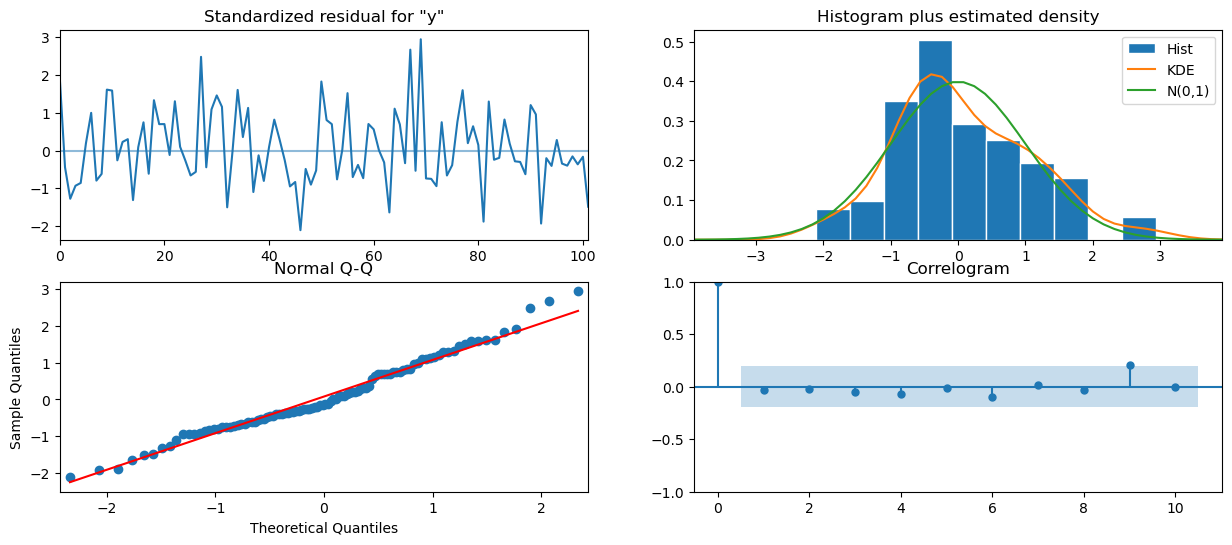

In [123]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [125]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   90.849106  15.914360      59.657533     122.040679
1  114.913416  16.150397      83.259220     146.567613
2   60.936673  16.150397      29.282477      92.590869
3   70.599288  16.150396      38.945093     102.253484
4   76.843515  16.150393      45.189325     108.497704

In [126]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

25.343324368777072


In [127]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)             30.903804
ARIMA(4,1,2)             30.607788
SARIMA(0,1,2)(2,0,2,12)  25.343324

Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [128]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 24)
Model: (0, 1, 2)(0, 0, 2, 24)
Model: (1, 1, 0)(1, 0, 0, 24)
Model: (1, 1, 1)(1, 0, 1, 24)
Model: (1, 1, 2)(1, 0, 2, 24)
Model: (2, 1, 0)(2, 0, 0, 24)
Model: (2, 1, 1)(2, 0, 1, 24)
Model: (2, 1, 2)(2, 0, 2, 24)


In [129]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [130]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00769D+00    |proj g|=  3.91436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.620D-07   5.008D+00
  F =   5.0076319775357376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 24) - AIC:1303.984314159292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01798D+00    |proj g|=  1.80352D-01

At iterate    5    f=  2.96627D+00    |proj g|=  5.60049D-02

At iterate   10    f=  2.88376D+00    |proj g|=  1.31179D-02

At iterate   15    f=  2.88347D+00    |proj g|=  1.47225D-03

At iterate   20    f=  2.88342D+00    |proj g|=  1.67415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   2.678D-08   2.883D+00
  F =   2.8834157259290203     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70966D+00    |proj g|=  1.19245D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   1.184D-05   3.710D+00
  F =   3.7096613326628782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 0, 24) - AIC:968.5119464923483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.91996D+00    |proj g|=  1.06586D-02

At iterate   10    f=  2.88424D+00    |proj g|=  1.44584D-01

At iterate   15    f=  2.78497D+00    |proj g|=  4.64008D-02

At iterate   20    f=  2.77261D+00    |proj g|=  3.58805D-03

At iterate   25    f=  2.77251D+00    |proj g|=  4.00235D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     27      1     0     0   4.002D-06   2.773D+00
  F =   2.7725138719161033     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 2, 24) - AIC:728.8536066981868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     13      1     0     0   1.101D-05   2.831D+00
  F =   2.8305214390637996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 0, 24) - AIC:741.9355741565879
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82372D+00    |proj g|=  1.25952D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.80583D+00    |proj g|=  5.77407D-02

At iterate   10    f=  2.80499D+00    |proj g|=  4.57202D-02

At iterate   15    f=  2.80374D+00    |proj g|=  6.22326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   7.239D-06   2.804D+00
  F =   2.8037407311953051     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 1, 24) - AIC:736.9725901107794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.91721D+00    |proj g|=  1.06761D-02

At iterate   10    f=  2.84924D+00    |proj g|=  1.35939D-01

At iterate   15    f=  2.79654D+00    |proj g|=  6.07345D-02

At iterate   20    f=  2.77127D+00    |proj g|=  2.94301D-02

At iterate   25    f=  2.76771D+00    |proj g|=  3.91298D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     35      1     0     0   4.924D-06   2.768D+00
  F =   2.7676987008661924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 24) - AIC:729.60166222521
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.56137D+00    |proj g|=  7.00896D-02

At iterate   20    f=  3.56098D+00    |proj g|=  2.14030D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   2.140D-05   3.561D+00
  F =   3.5609767026893935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 1, 24) - AIC:931.8539426992423
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88603D+00    |proj g|=  1.57632D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.83531D+00    |proj g|=  1.12307D-02

At iterate   10    f=  2.76268D+00    |proj g|=  1.29418D-01

At iterate   15    f=  2.68765D+00    |proj g|=  7.73171D-02

At iterate   20    f=  2.68688D+00    |proj g|=  3.78630D-03

At iterate   25    f=  2.68682D+00    |proj g|=  2.63065D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     37      1     0     0   2.631D-05   2.687D+00
  F =   2.6868203852882546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 24) - AIC:706.5733001749462
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.50631D+00    |proj g|=  9.48826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     32      1     0     0   1.332D-05   3.506D+00
  F =   3.5063030100846602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 0, 24) - AIC:917.6387826220116
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70292D+00    |proj g|=  1.01363D-01

At iterate    5    f=  3.65112D+00    |proj g|=  2.38135D-02


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.49852D+00    |proj g|=  1.84741D-01

At iterate   15    f=  3.44402D+00    |proj g|=  1.20803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   6.730D-06   3.444D+00
  F =   3.4440142384128167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 24) - AIC:903.4437019873324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88603D+00    |proj g|=  2.44019D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.79449D+00    |proj g|=  2.56419D-02

At iterate   10    f=  2.66785D+00    |proj g|=  3.01169D-01

At iterate   15    f=  2.57296D+00    |proj g|=  1.69849D-02

At iterate   20    f=  2.57273D+00    |proj g|=  3.61181D-04

At iterate   25    f=  2.57273D+00    |proj g|=  2.32732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   2.732D-05   2.573D+00
  F =   2.5727290695825755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 2, 24) - AIC:678.9095580914696
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.86192D+00    |proj g|=  1.72258D-02

At iterate   10    f=  2.73689D+00    |proj g|=  1.47648D-01

At iterate   15    f=  2.66687D+00    |proj g|=  1.45925D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     33      1     0     0   6.291D-06   2.667D+00
  F =   2.6668396567247634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 24) - AIC:701.3783107484385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.86065D+00    |proj g|=  1.36996D-02

At iterate   10    f=  2.77122D+00    |proj g|=  2.09511D-01

At iterate   15    f=  2.69435D+00    |proj g|=  1.24877D-01

At iterate   20    f=  2.63745D+00    |proj g|=  3.95361D-02

At iterate   25    f=  2.63359D+00    |proj g|=  5.45720D-03

At iterate   30    f=  2.63357D+00    |proj g|=  1.14552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     39      1     0     0   1.146D-05   2.634D+00
  F =   2.6335653543608353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 24) - AIC:694.72699213381

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.79240D+00    |proj g|=  1.40582D-02

At iterate   10    f=  2.77802D+00    |proj g|=  2.80315D-02

At iterate   15    f=  2.64259D+00    |proj g|=  1.24419D-01

At iterate   20    f=  2.57157D+00    |proj g|=  3.65769D-02

At iterate   25    f=  2.57030D+00    |proj g|=  1.49327D-03

At iterate   30    f=  2.57027D+00    |proj g|=  3.60657D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     40      1     0     0   3.607D-05   2.570D+00
  F =   2.5702698006871474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 2, 24) - AIC:680.27014817865

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64637D+00    |proj g|=  8.63420D-02


 This problem is unconstrained.



At iterate    5    f=  3.63627D+00    |proj g|=  1.53153D-02

At iterate   10    f=  3.56975D+00    |proj g|=  1.64802D-01

At iterate   15    f=  3.51300D+00    |proj g|=  6.30025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   1.726D-05   3.513D+00
  F =   3.5129923012708368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 1, 24) - AIC:921.3779983304175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.78003D+00    |proj g|=  1.23638D-02

At iterate   10    f=  2.71223D+00    |proj g|=  2.01704D-01

At iterate   15    f=  2.65263D+00    |proj g|=  3.08878D-02

At iterate   20    f=  2.65183D+00    |proj g|=  2.06807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.112D-06   2.652D+00
  F =   2.6518288590777934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 2, 24) - AIC:699.4755033602263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.49841D+00    |proj g|=  2.81067D-02

At iterate   20    f=  3.49821D+00    |proj g|=  2.17364D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   2.174D-06   3.498D+00
  F =   3.4982101251266147     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 24) - AIC:917.5346325329198
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62211D+00    |proj g|=  1.00640D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.58541D+00    |proj g|=  1.79863D-02

At iterate   10    f=  3.56947D+00    |proj g|=  5.50461D-02

At iterate   15    f=  3.41106D+00    |proj g|=  2.47960D-01

At iterate   20    f=  3.39780D+00    |proj g|=  1.42842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   9.048D-06   3.398D+00
  F =   3.3977267494129046     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 1, 24) - AIC:893.4089548473552


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82333D+00    |proj g|=  2.45193D-01

At iterate    5    f=  2.73283D+00    |proj g|=  2.22200D-02

At iterate   10    f=  2.70527D+00    |proj g|=  1.29525D-01

At iterate   15    f=  2.55252D+00    |proj g|=  1.45671D-01

At iterate   20    f=  2.53096D+00    |proj g|=  2.56170D-03

At iterate   25    f=  2.53088D+00    |proj g|=  3.62550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.83670D+00    |proj g|=  1.36564D-02

At iterate   10    f=  2.71892D+00    |proj g|=  3.04755D-01

At iterate   15    f=  2.66378D+00    |proj g|=  1.61008D-02

At iterate   20    f=  2.66360D+00    |proj g|=  1.74370D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   5.582D-06   2.664D+00
  F =   2.6636036948430197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 0, 24) - AIC:702.5369606591852
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.83541D+00    |proj g|=  1.39794D-02

At iterate   10    f=  2.73680D+00    |proj g|=  3.20583D-01

At iterate   15    f=  2.63657D+00    |proj g|=  3.13344D-02

At iterate   20    f=  2.63205D+00    |proj g|=  8.12297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     33      1     0     0   2.959D-05   2.632D+00
  F =   2.6320304626361639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 24) - AIC:696.3279202854026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.73207D+00    |proj g|=  2.14700D-02

At iterate   10    f=  2.72027D+00    |proj g|=  3.67782D-02

At iterate   15    f=  2.58926D+00    |proj g|=  4.88654D-01

At iterate   20    f=  2.53483D+00    |proj g|=  7.93972D-02

At iterate   25    f=  2.52994D+00    |proj g|=  1.69221D-02

At iterate   30    f=  2.52948D+00    |proj g|=  9.75988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     41      1     0     0   7.158D-06   2.529D+00
  F =   2.5294813183638443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 2, 24) - AIC:671.66514277459

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 0, 1, 24) - AIC:967.4367596255845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96525D+00    |proj g|=  1.65118D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.91767D+00    |proj g|=  5.55502D-02

At iterate   10    f=  2.82032D+00    |proj g|=  1.81004D-02

At iterate   15    f=  2.81988D+00    |proj g|=  3.73219D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   4.539D-06   2.820D+00
  F =   2.8198760624742483     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 24) - AIC:741.1677762433045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.63699D+00    |proj g|=  1.73569D-01

At iterate   15    f=  3.60795D+00    |proj g|=  1.13386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   4.443D-06   3.608D+00
  F =   3.6079470305930448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 1, 24) - AIC:946.0662279541916
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96525D+00    |proj g|=  2.60264D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.87540D+00    |proj g|=  1.16993D-02

At iterate   10    f=  2.79366D+00    |proj g|=  2.70105D-01

At iterate   15    f=  2.72465D+00    |proj g|=  9.95897D-02

At iterate   20    f=  2.70966D+00    |proj g|=  5.36619D-03

At iterate   25    f=  2.70942D+00    |proj g|=  1.03744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   9.571D-06   2.709D+00
  F =   2.7094246800606681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 24) - AIC:714.4504168157737
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  2.75214D+00    |proj g|=  8.10097D-02

At iterate   15    f=  2.74193D+00    |proj g|=  3.86074D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   6.842D-06   2.742D+00
  F =   2.7419330361192404     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 24) - AIC:720.9025893910025


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88387D+00    |proj g|=  4.71872D-02

At iterate    5    f=  2.86474D+00    |proj g|=  4.78539D-02

At iterate   10    f=  2.71458D+00    |proj g|=  6.83595D-02

At iterate   15    f=  2.71289D+00    |proj g|=  9.60779D-03

At iterate   20    f=  2.71258D+00    |proj g|=  3.93183D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     27      1     0     0   3.932D-06   2.713D+00
  F =   2.7125752742694984     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.87280D+00    |proj g|=  2.07898D-02

At iterate   10    f=  2.80992D+00    |proj g|=  1.07501D-01

At iterate   15    f=  2.71526D+00    |proj g|=  6.86165D-02

At iterate   20    f=  2.70592D+00    |proj g|=  1.40585D-02

At iterate   25    f=  2.70543D+00    |proj g|=  2.86205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     38      1     0     0   3.736D-06   2.705D+00
  F =   2.7054279756251347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 2, 24) - AIC:715.411273662535
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.69584D+00    |proj g|=  1.66182D-02

At iterate   10    f=  3.66093D+00    |proj g|=  1.35794D-01

At iterate   15    f=  3.55198D+00    |proj g|=  9.47484D-03

At iterate   20    f=  3.55178D+00    |proj g|=  1.32126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   3.230D-06   3.552D+00
  F =   3.5517817004452712     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 24) - AIC:931.4632421157705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.83215D+00    |proj g|=  1.26001D-02

At iterate   10    f=  2.76216D+00    |proj g|=  2.41125D-01

At iterate   15    f=  2.68703D+00    |proj g|=  3.71783D-02

At iterate   20    f=  2.68576D+00    |proj g|=  7.06910D-03

At iterate   25    f=  2.68568D+00    |proj g|=  5.64337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     28      1     0     0   8.589D-06   2.686D+00
  F =   2.6856769344868794     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 24) - AIC:708.2760029665886
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.68224D+00    |proj g|=  5.88208D-02

At iterate   10    f=  3.62777D+00    |proj g|=  1.10131D-01

At iterate   15    f=  3.52965D+00    |proj g|=  1.54734D-01

At iterate   20    f=  3.47124D+00    |proj g|=  2.11252D-02

At iterate   25    f=  3.47105D+00    |proj g|=  2.32772D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     38      1     0     0   2.698D-07   3.471D+00
  F =   3.4710466990355844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 0, 24) - AIC:910.4721417492519
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.64108D+00    |proj g|=  3.64881D-02

At iterate   10    f=  3.52722D+00    |proj g|=  1.10664D-01

At iterate   15    f=  3.43870D+00    |proj g|=  3.88902D-02

At iterate   20    f=  3.43842D+00    |proj g|=  5.43454D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     29      1     0     0   1.647D-06   3.438D+00
  F =   3.4384245911736206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 1, 24) - AIC:903.9903937051414
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.78850D+00    |proj g|=  2.14926D-02

At iterate   10    f=  2.73299D+00    |proj g|=  1.79578D-01

At iterate   15    f=  2.58302D+00    |proj g|=  1.82068D-01

At iterate   20    f=  2.57206D+00    |proj g|=  9.19512D-04

At iterate   25    f=  2.57201D+00    |proj g|=  2.20118D-03

At iterate   30    f=  2.57200D+00    |proj g|=  1.03736D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   1.014D-05   2.572D+00
  F =   2.5720001705527786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 24) - AIC:680.72004434372

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83254D+00    |proj g|=  4.99882D-02

At iterate    5    f=  2.82074D+00    |proj g|=  2.06529D-02

At iterate   10    f=  2.73805D+00    |proj g|=  7.19673D-02

At iterate   15    f=  2.65867D+00    |proj g|=  1.97881D-01

At iterate   20    f=  2.63349D+00    |proj g|=  8.19309D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   1.675D-05   2.633D+00
  F =   2.6334677488479867     

CONVERG

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.82062D+00    |proj g|=  1.33446D-02

At iterate   10    f=  2.74681D+00    |proj g|=  7.97274D-02

At iterate   15    f=  2.62967D+00    |proj g|=  1.05331D-01

At iterate   20    f=  2.60344D+00    |proj g|=  6.19698D-03

At iterate   25    f=  2.60340D+00    |proj g|=  6.37126D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     40      1     0     0   2.446D-05   2.603D+00
  F =   2.6033970422083637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 24) - AIC:688.8832309741746
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.78761D+00    |proj g|=  2.13979D-02

At iterate   10    f=  2.77428D+00    |proj g|=  5.00088D-02

At iterate   15    f=  2.59713D+00    |proj g|=  1.58843D-01

At iterate   20    f=  2.56947D+00    |proj g|=  5.13306D-03

At iterate   25    f=  2.56914D+00    |proj g|=  2.05858D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   1.717D-05   2.569D+00
  F =   2.5691378684826582     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 24) - AIC:681.9758458054912
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 0, 0, 24) - AIC:1231.5587519588146
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64683D+00    |proj g|=  1.00498D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.63086D+00    |proj g|=  1.62751D-02

At iterate   10    f=  3.60151D+00    |proj g|=  1.23982D-01

At iterate   15    f=  3.57619D+00    |proj g|=  9.77324D-02

At iterate   20    f=  3.56614D+00    |proj g|=  3.63633D-01

At iterate   25    f=  3.51324D+00    |proj g|=  6.53829D-02

At iterate   30    f=  3.50957D+00    |proj g|=  3.44086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     47      1     0     0   7.187D-06   3.510D+00
  F =   3.5095662461868171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 1, 24) - AIC:922.48722400857

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82800D+00    |proj g|=  1.74584D-01


 This problem is unconstrained.



At iterate    5    f=  2.77481D+00    |proj g|=  1.17970D-02

At iterate   10    f=  2.73791D+00    |proj g|=  7.03803D-02

At iterate   15    f=  2.73039D+00    |proj g|=  1.03984D-01

At iterate   20    f=  2.72833D+00    |proj g|=  2.83781D-02

At iterate   25    f=  2.65782D+00    |proj g|=  1.22345D-01

At iterate   30    f=  2.64886D+00    |proj g|=  2.64447D-02

At iterate   35    f=  2.64711D+00    |proj g|=  8.32476D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     53      1     0     0   5.225D-06   2.647D+00
  F =   2.6471078976064235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.55863D+00    |proj g|=  2.59393D-01

At iterate   20    f=  3.50427D+00    |proj g|=  3.72197D-01

At iterate   25    f=  3.46628D+00    |proj g|=  1.14103D-01

At iterate   30    f=  3.46447D+00    |proj g|=  6.33626D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     43      1     0     0   4.805D-06   3.464D+00
  F =   3.4644701798228965     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 0, 24) - AIC:910.762246753953
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.49842D+00    |proj g|=  1.03155D-01

At iterate   15    f=  3.46401D+00    |proj g|=  5.91930D-02

At iterate   20    f=  3.45929D+00    |proj g|=  7.13810D-02

At iterate   25    f=  3.40636D+00    |proj g|=  1.89103D-01

At iterate   30    f=  3.39473D+00    |proj g|=  4.89440D-03

At iterate   35    f=  3.39467D+00    |proj g|=  7.91633D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     54      1     0     0   7.916D-07   3.395D+00
  F =   3.3946743827184651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 1, 24) - AIC:894.61533950680

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.72668D+00    |proj g|=  1.33779D-02

At iterate   10    f=  2.67922D+00    |proj g|=  8.41174D-02

At iterate   15    f=  2.63268D+00    |proj g|=  9.37876D-02

At iterate   20    f=  2.58291D+00    |proj g|=  2.01670D-01

At iterate   25    f=  2.54486D+00    |proj g|=  1.36440D-01

At iterate   30    f=  2.52977D+00    |proj g|=  1.48562D-02

At iterate   35    f=  2.52941D+00    |proj g|=  5.98510D-03

At iterate   40    f=  2.52939D+00    |proj g|=  4.43529D-04

At iterate   45    f=  2.52939D+00    |proj g|=  4.31106D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     59   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.79545D+00    |proj g|=  1.72514D-02

At iterate   10    f=  2.73573D+00    |proj g|=  1.18079D-01

At iterate   15    f=  2.69939D+00    |proj g|=  9.98775D-02

At iterate   20    f=  2.69081D+00    |proj g|=  5.65649D-02

At iterate   25    f=  2.66943D+00    |proj g|=  1.94579D-01

At iterate   30    f=  2.64400D+00    |proj g|=  4.42865D-02

At iterate   35    f=  2.63259D+00    |proj g|=  3.17945D-02

At iterate   40    f=  2.63241D+00    |proj g|=  5.04575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     59      1     0     0   1.010D-05   2.632D+00
  F =   2.63240666447

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80919D+00    |proj g|=  5.21061D-02

At iterate    5    f=  2.79304D+00    |proj g|=  2.31537D-02

At iterate   10    f=  2.73871D+00    |proj g|=  9.98387D-02

At iterate   15    f=  2.68992D+00    |proj g|=  1.59365D-01

At iterate   20    f=  2.67942D+00    |proj g|=  5.57757D-02

At iterate   25    f=  2.64350D+00    |proj g|=  2.48833D-01

At iterate   30    f=  2.61029D+00    |proj g|=  1.55459D-01

At iterate   35    f=  2.60578D+00    |proj g|=  5.60724D-03

At iterate   40    f=  2.60243D+00    |proj g|=  4.10683D-02

At iterate   45    f=  2.60054D+00    |proj g|=  8.51821D-03

At iterate   50    f=  2.59969D+00    |proj g|=  1.98420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.72535D+00    |proj g|=  1.50434D-02

At iterate   10    f=  2.70842D+00    |proj g|=  4.02457D-02

At iterate   15    f=  2.59051D+00    |proj g|=  1.98055D-01

At iterate   20    f=  2.57563D+00    |proj g|=  1.05488D-01

At iterate   25    f=  2.57266D+00    |proj g|=  2.86798D-01

At iterate   30    f=  2.55885D+00    |proj g|=  2.94844D-01

At iterate   35    f=  2.55081D+00    |proj g|=  1.00816D-01

At iterate   40    f=  2.52840D+00    |proj g|=  1.79666D-02

At iterate   45    f=  2.52797D+00    |proj g|=  7.62955D-04

At iterate   50    f=  2.52797D+00    |proj g|=  1.11633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 0)x(0, 0, 1, 24) - AIC:961.1635740567083
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92471D+00    |proj g|=  1.82975D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.87549D+00    |proj g|=  2.37969D-02

At iterate   10    f=  2.77870D+00    |proj g|=  6.33859D-02

At iterate   15    f=  2.76871D+00    |proj g|=  4.62134D-04

At iterate   20    f=  2.76871D+00    |proj g|=  1.04148D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.041D-06   2.769D+00
  F =   2.7687053946153206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 24) - AIC:729.8634025999834
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.165D-05   3.523D+00
  F =   3.5234450383928624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 0, 24) - AIC:924.0957099821442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69636D+00    |proj g|=  1.08995D-01

At iterate    5    f=  3.65932D+00    |proj g|=  1.46397D-02

At iterate   10    f=  3.53417D+00    |proj g|=  1.23467D-01

At iterate   15

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.83354D+00    |proj g|=  1.22171D-02

At iterate   10    f=  2.75121D+00    |proj g|=  1.75557D-01

At iterate   15    f=  2.68914D+00    |proj g|=  5.42817D-02

At iterate   20    f=  2.68825D+00    |proj g|=  3.20168D-03

At iterate   25    f=  2.68816D+00    |proj g|=  3.22345D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   1.789D-05   2.688D+00
  F =   2.6881586637476684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 24) - AIC:710.9212525743937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  2.68341D+00    |proj g|=  4.63525D-02

At iterate   15    f=  2.67989D+00    |proj g|=  4.56645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   8.677D-06   2.680D+00
  F =   2.6798914760170658     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 0, 24) - AIC:706.7717837644371
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80750D+00    |proj g|=  5.28525D-02


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.79602D+00    |proj g|=  2.79985D-02

At iterate   10    f=  2.68154D+00    |proj g|=  1.80339D-01

At iterate   15    f=  2.64016D+00    |proj g|=  7.17445D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   5.667D-05   2.640D+00
  F =   2.6400851742688887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 24) - AIC:698.422145309911
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.79434D+00    |proj g|=  1.22228D-02

At iterate   10    f=  2.69899D+00    |proj g|=  7.41269D-02

At iterate   15    f=  2.65646D+00    |proj g|=  9.16216D-02

At iterate   20    f=  2.63896D+00    |proj g|=  1.04902D-02

At iterate   25    f=  2.63879D+00    |proj g|=  5.17581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     33      1     0     0   6.106D-05   2.639D+00
  F =   2.6387891577215603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 2, 24) - AIC:700.0851810076057
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  4.76446D+00    |proj g|=  1.62976D-01

At iterate   10    f=  4.75382D+00    |proj g|=  5.36944D-03

At iterate   15    f=  4.74962D+00    |proj g|=  3.15854D-02

At iterate   20    f=  4.74892D+00    |proj g|=  1.09248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     30      1     0     0   1.970D-05   4.749D+00
  F =   4.7489231707964876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 0, 24) - AIC:1242.7200244070868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.82565D+00    |proj g|=  4.94618D-02

At iterate   10    f=  2.81719D+00    |proj g|=  1.84039D-02

At iterate   15    f=  2.73528D+00    |proj g|=  9.17326D-02

At iterate   20    f=  2.69296D+00    |proj g|=  5.21684D-02

At iterate   25    f=  2.68492D+00    |proj g|=  1.33249D-03

At iterate   30    f=  2.68484D+00    |proj g|=  6.91019D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     48      1     0     0   6.453D-06   2.685D+00
  F =   2.6848386730363503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 2, 24) - AIC:710.05805498945

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  3.43380D+00    |proj g|=  4.48006D-02

At iterate   20    f=  3.43172D+00    |proj g|=  7.33350D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     27      1     0     0   1.643D-05   3.432D+00
  F =   3.4317171158604647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 24) - AIC:902.2464501237208
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68271D+00    |proj g|=  1.06486D-01


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.63143D+00    |proj g|=  3.92816D-02

At iterate   10    f=  3.60879D+00    |proj g|=  5.78620D-02

At iterate   15    f=  3.43520D+00    |proj g|=  5.28562D-02

At iterate   20    f=  3.43153D+00    |proj g|=  1.42007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.651D-05   3.432D+00
  F =   3.4315253609982359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 24) - AIC:904.1965938595413
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.77735D+00    |proj g|=  1.71926D-02

At iterate   10    f=  2.74405D+00    |proj g|=  6.89943D-02

At iterate   15    f=  2.57449D+00    |proj g|=  1.11569D-01

At iterate   20    f=  2.56986D+00    |proj g|=  3.73070D-04

At iterate   25    f=  2.56986D+00    |proj g|=  1.49284D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     38      1     0     0   9.716D-06   2.570D+00
  F =   2.5698585647825150     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 2, 24) - AIC:682.1632268434539
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.77749D+00    |proj g|=  2.44514D-02

At iterate   10    f=  2.74053D+00    |proj g|=  7.17904D-02

At iterate   15    f=  2.60025D+00    |proj g|=  5.27624D-02

At iterate   20    f=  2.59961D+00    |proj g|=  6.65970D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     34      1     0     0   4.774D-05   2.600D+00
  F =   2.5996052347870440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 24) - AIC:687.8973610446315


/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79565D+00    |proj g|=  5.29266D-02

At iterate    5    f=  2.77516D+00    |proj g|=  2.15199D-02

At iterate   10    f=  2.74557D+00    |proj g|=  6.89130D-02

At iterate   15    f=  2.65011D+00    |proj g|=  9.74992D-02

At iterate   20    f=  2.57591D+00    |proj g|=  1.07612D-01

At iterate   25    f=  2.56903D+00    |proj g|=  5.78585D-03

At iterate   30    f=  2.56896D+00    |proj g|=  5.76923D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.77359D+00    |proj g|=  1.87600D-02

At iterate   10    f=  2.74004D+00    |proj g|=  8.40283D-02

At iterate   15    f=  2.61310D+00    |proj g|=  5.44166D-02

At iterate   20    f=  2.57892D+00    |proj g|=  4.52467D-02

At iterate   25    f=  2.56696D+00    |proj g|=  6.03773D-03

At iterate   30    f=  2.56690D+00    |proj g|=  1.63542D-03

At iterate   35    f=  2.56689D+00    |proj g|=  1.14179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     42      1     0     0   1.142D-04   2.567D+00
  F =   2.5668911161250980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  4.70730D+00    |proj g|=  3.10259D-03

At iterate   15    f=  4.70711D+00    |proj g|=  2.47045D-02

At iterate   20    f=  4.70585D+00    |proj g|=  1.94705D-02

At iterate   25    f=  4.70579D+00    |proj g|=  4.57936D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   4.579D-06   4.706D+00
  F =   4.7057869057663257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 0, 24) - AIC:1233.5045954992447
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.77447D+00    |proj g|=  1.11120D-02

At iterate   10    f=  2.74203D+00    |proj g|=  7.05952D-02

At iterate   15    f=  2.71474D+00    |proj g|=  5.83302D-02

At iterate   20    f=  2.71319D+00    |proj g|=  2.76248D-01

At iterate   25    f=  2.70867D+00    |proj g|=  5.81809D-02

At iterate   30    f=  2.69013D+00    |proj g|=  1.52733D-01

At iterate   35    f=  2.66696D+00    |proj g|=  1.89406D-01

At iterate   40    f=  2.64663D+00    |proj g|=  1.00380D-02

At iterate   45    f=  2.64644D+00    |proj g|=  1.45091D-03

At iterate   50    f=  2.64644D+00    |proj g|=  3.52842D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  3.61222D+00    |proj g|=  1.65991D-02

At iterate   10    f=  3.56212D+00    |proj g|=  2.51035D-01

At iterate   15    f=  3.44385D+00    |proj g|=  5.94410D-02

At iterate   20    f=  3.44148D+00    |proj g|=  5.75059D-02

At iterate   25    f=  3.43191D+00    |proj g|=  3.34524D-02

At iterate   30    f=  3.43166D+00    |proj g|=  7.86733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     47      1     0     0   2.585D-06   3.432D+00
  F =   3.4316589700467390     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 0, 0, 24) - AIC:904.23133221215

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  3.52320D+00    |proj g|=  3.10182D-01

At iterate   15    f=  3.42610D+00    |proj g|=  2.26154D-01

At iterate   20    f=  3.41845D+00    |proj g|=  5.77942D-02

At iterate   25    f=  3.41654D+00    |proj g|=  4.36089D-02

At iterate   30    f=  3.40881D+00    |proj g|=  1.05604D-01

At iterate   35    f=  3.40297D+00    |proj g|=  2.26455D-02

At iterate   40    f=  3.39995D+00    |proj g|=  2.40033D-02

At iterate   45    f=  3.39782D+00    |proj g|=  1.65757D-02

At iterate   50    f=  3.39702D+00    |proj g|=  4.30788D-03

At iterate   55    f=  3.39653D+00    |proj g|=  3.10558D-03

At iterate   60    f=  3.39628D+00    |proj g|=  2.08603D-03

At iterate   65    f=  3.39610D+00    |proj g|=  1.28140D-03

At iterate   70    f=  3.39599D+00    |proj g|=  1.88733D-03

At iterate   75    f=  3.39593D+00    |proj g|=  1.95370D-03

At iterate   80    f=  3.39589D+00    |proj g|=  2.84242D-03

At iterate   85    f=  3.39585D+00    |proj g|=  1.36916D-03

At iter

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82758D+00    |proj g|=  2.62086D-01

At iterate    5    f=  2.72845D+00    |proj g|=  2.38933D-02

At iterate   10    f=  2.70290D+00    |proj g|=  5.98503D-02

At iterate   15    f=  2.58247D+00    |proj g|=  1.21482D+00

At iterate   20    f=  2.56467D+00    |proj g|=  9.55137D-02

At iterate   25    f=  2.55774D+00    |proj g|=  4.81793D-02

At iterate   30    f=  2.54606D+00    |proj g|=  5.87600D-02

At iterate   35    f=  2.53132D+00    |proj g|=  2.63919D-02

At iterate   40    f=  2.52803D+00    |proj g|=  4.53862D-03

At iterate   45    f=  2.52798D+00    |proj g|=  8.73097D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  2.75958D+00    |proj g|=  1.34228D-02

At iterate   10    f=  2.68963D+00    |proj g|=  1.41206D-01

At iterate   15    f=  2.60945D+00    |proj g|=  2.86653D-02

At iterate   20    f=  2.60631D+00    |proj g|=  1.85895D-02

At iterate   25    f=  2.60055D+00    |proj g|=  1.35082D-02

At iterate   30    f=  2.59771D+00    |proj g|=  4.32078D-02

At iterate   35    f=  2.59577D+00    |proj g|=  2.87275D-03

At iterate   40    f=  2.59576D+00    |proj g|=  1.02980D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     61      1     0     0   1.030D-05   2.596D+00
  F =   2.59576410162

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77314D+00    |proj g|=  5.17811D-02

At iterate    5    f=  2.75705D+00    |proj g|=  1.56784D-02

At iterate   10    f=  2.66249D+00    |proj g|=  1.57779D-01

At iterate   15    f=  2.63672D+00    |proj g|=  7.04475D-02

At iterate   20    f=  2.57614D+00    |proj g|=  1.13748D-01

At iterate   25    f=  2.57080D+00    |proj g|=  3.78574D-02

At iterate   30    f=  2.56981D+00    |proj g|=  6.71465D-04

At iterate   35    f=  2.56980D+00    |proj g|=  6.79097D-04

At iterate   40    f=  2.56980D+00    |proj g|=  1.27759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.72496D+00    |proj g|=  1.88502D-02

At iterate   10    f=  2.70867D+00    |proj g|=  7.04376D-02

At iterate   15    f=  2.58142D+00    |proj g|=  8.89073D-02

At iterate   20    f=  2.54513D+00    |proj g|=  2.81151D-01

At iterate   25    f=  2.54204D+00    |proj g|=  4.48821D-02

At iterate   30    f=  2.53663D+00    |proj g|=  3.17634D-02

At iterate   35    f=  2.52563D+00    |proj g|=  2.07482D-02

At iterate   40    f=  2.52422D+00    |proj g|=  3.31555D-03

At iterate   45    f=  2.52421D+00    |proj g|=  9.30124D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     58   

/var/folders/v3/w2fxtj257m992bzz44lcb4p00000gn/T/ipykernel_26365/2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [131]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
23  (0, 1, 2)  (1, 0, 2, 24)  670.027549
50  (1, 1, 2)  (1, 0, 2, 24)  671.642194
26  (0, 1, 2)  (2, 0, 2, 24)  671.665143
53  (1, 1, 2)  (2, 0, 2, 24)  673.271274
77  (2, 1, 2)  (1, 0, 2, 24)  673.274340

In [132]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82333D+00    |proj g|=  2.45193D-01


/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.73283D+00    |proj g|=  2.22200D-02

At iterate   10    f=  2.70527D+00    |proj g|=  1.29525D-01

At iterate   15    f=  2.55252D+00    |proj g|=  1.45671D-01

At iterate   20    f=  2.53096D+00    |proj g|=  2.56170D-03

At iterate   25    f=  2.53088D+00    |proj g|=  3.62550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   2.574D-05   2.531D+00
  F =   2.5308751892499610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:        

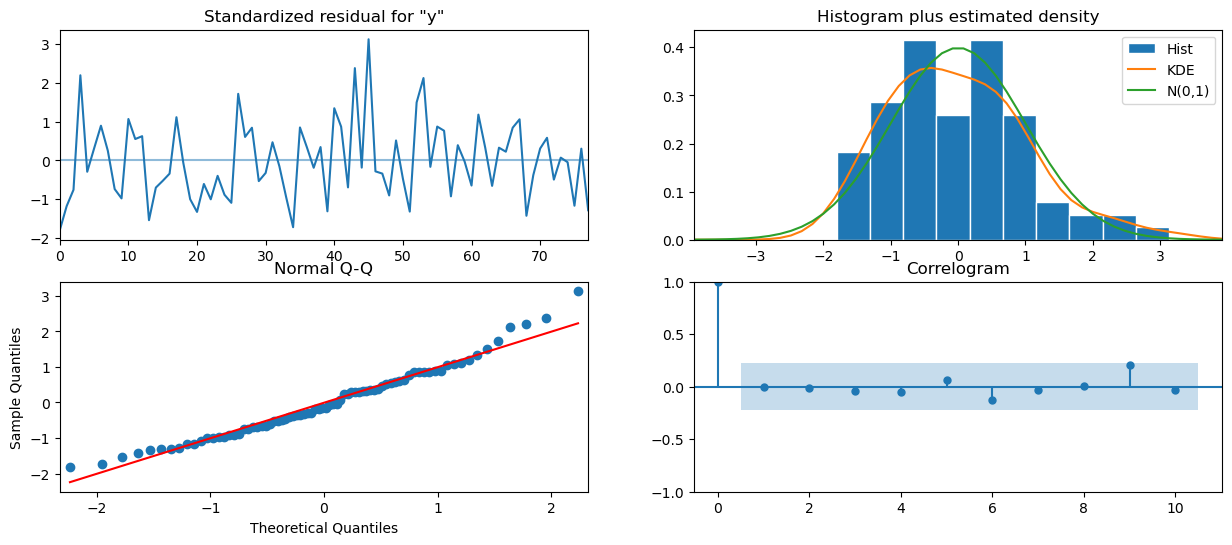

In [133]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 24, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

Predict on the Test Set using this model and evaluate the model.

In [134]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [135]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   90.727227  14.757082      61.803877     119.650576
1  111.564533  14.816957      82.523831     140.605236
2   58.147405  14.816958      29.106701      87.188108
3   66.914807  14.816958      37.874103      95.955511
4   79.986971  14.816958      50.946268     109.027675

In [136]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

19.58115921914166


In [137]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(1,0,2,24)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)             30.903804
ARIMA(4,1,2)             30.607788
SARIMA(0,1,2)(2,0,2,12)  25.343324
SARIMA(0,1,2)(1,0,2,24)  19.581159

### 5.3.2 Manual SARIMA 

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


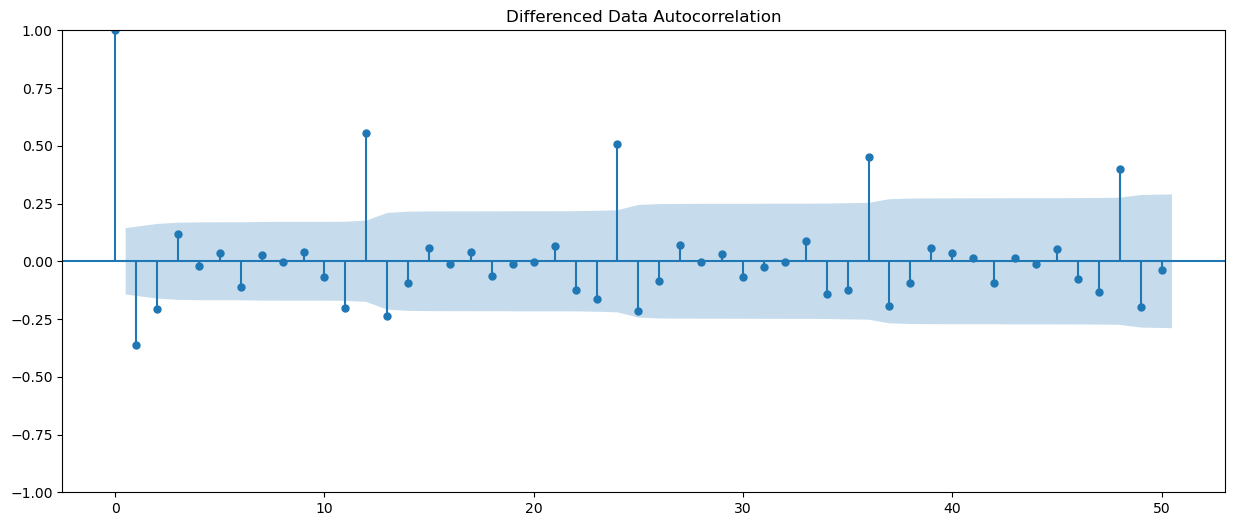

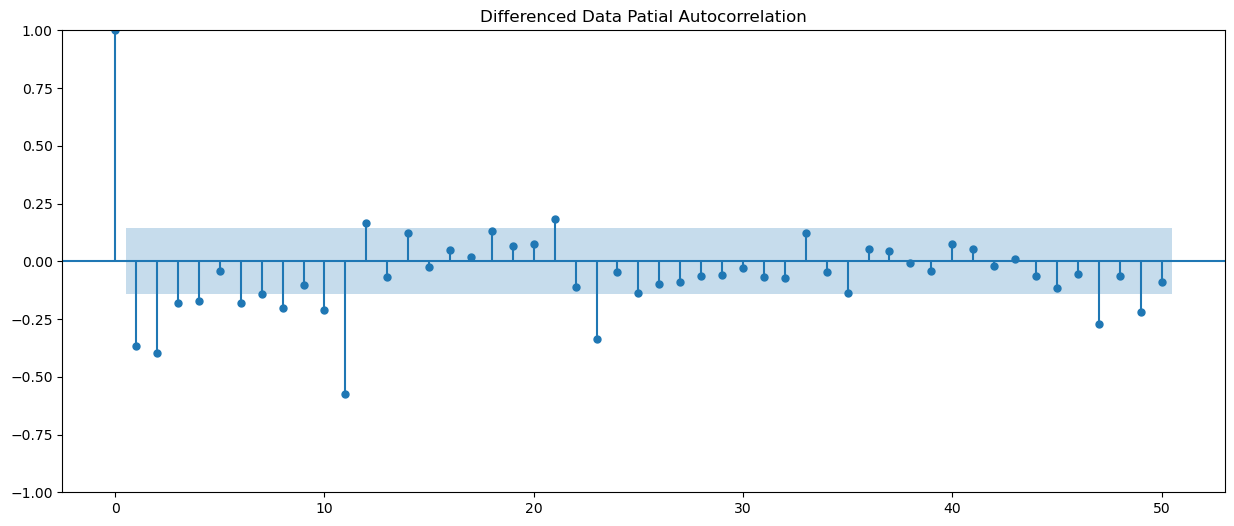

In [138]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

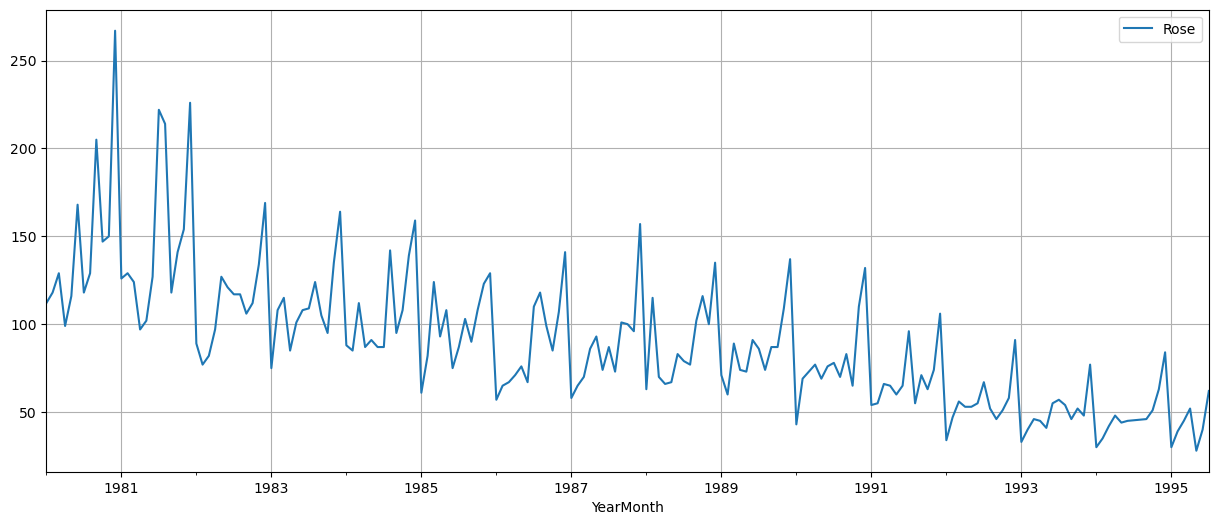

In [139]:
df.plot()
plt.grid();

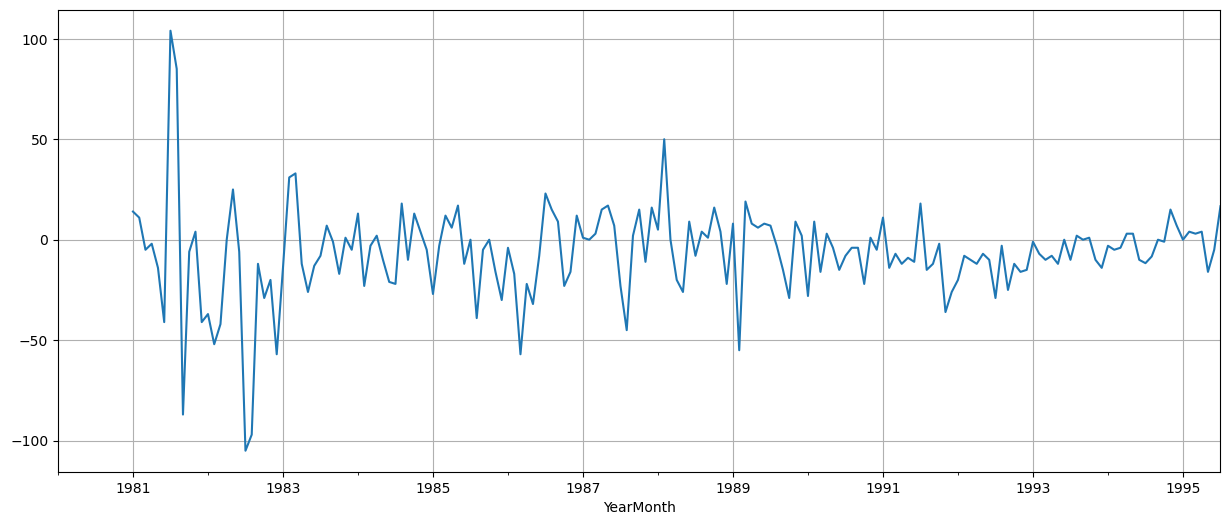

In [140]:
(df['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

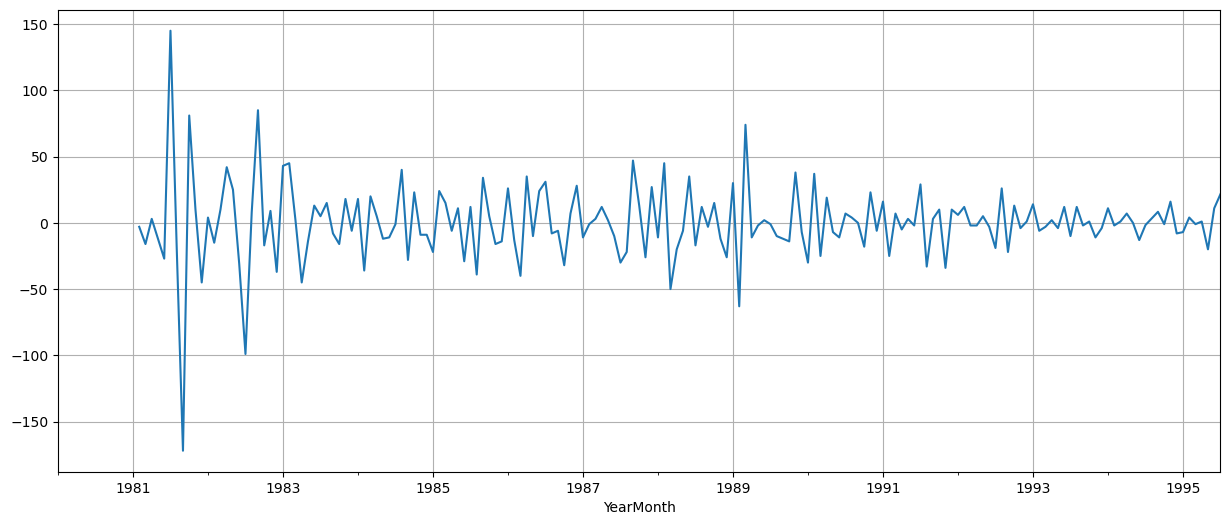

In [141]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

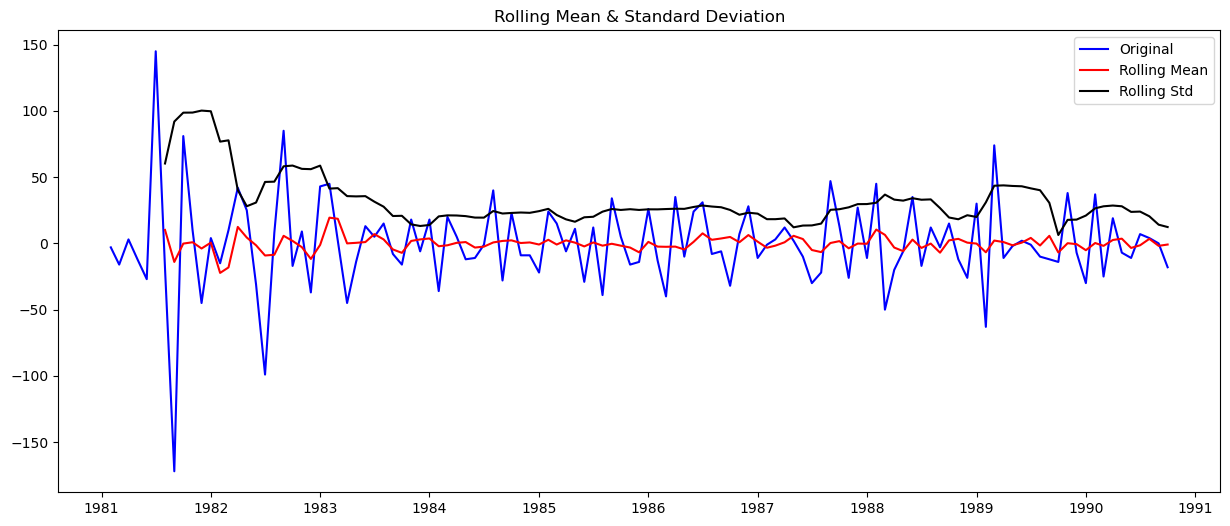

Results of Dickey-Fuller Test:
Test Statistic                  -3.664525
p-value                          0.004641
#Lags Used                      11.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64 



In [142]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


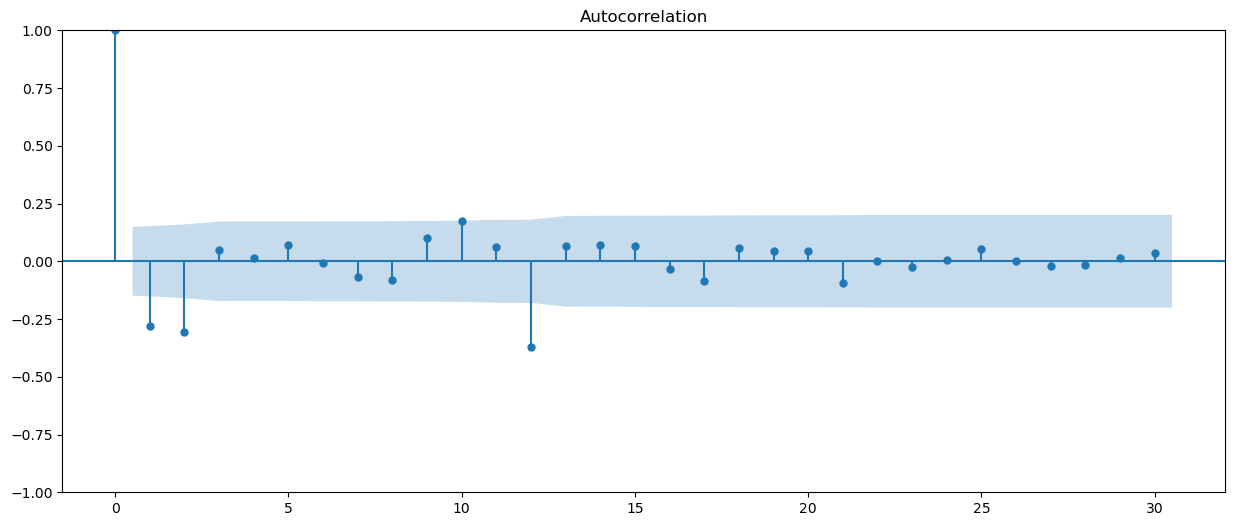

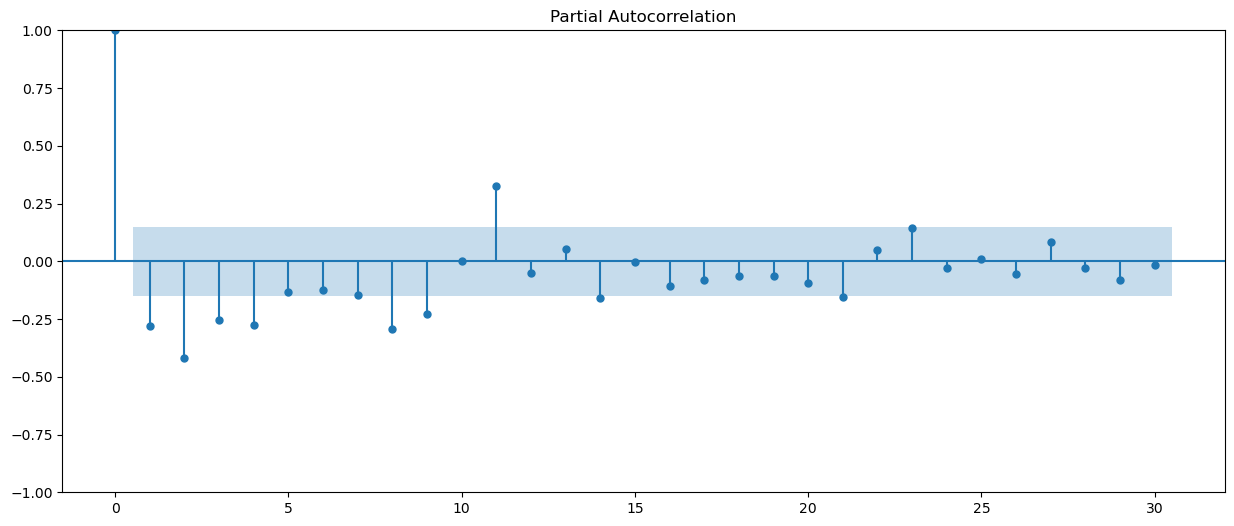

In [143]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 4.

The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 2. 

Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).


In [144]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23585D+00    |proj g|=  2.84203D-01

At iterate    5    f=  2.15503D+00    |proj g|=  1.49490D-02

At iterate   10    f=  2.14076D+00    |proj g|=  1.29195D-02

At iterate   15    f=  2.11796D+00    |proj g|=  3.65654D-02

At iterate   20    f=  2.08478D+00    |proj g|=  7.95852D-02

At iterate   25    f=  2.07803D+00    |proj g|=  1.81816D-02

At iterate   30    f=  2.07786D+00    |proj g|=  1.71750D-03

At iterate   35    f=  2.07782D+00    |proj g|=  2.30652D-03

At iterate   40    f=  2.07778D+00    |proj g|=  2.51223D-03

At iterate   45    f=  2.07777D+00    |proj g|=  7.35048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

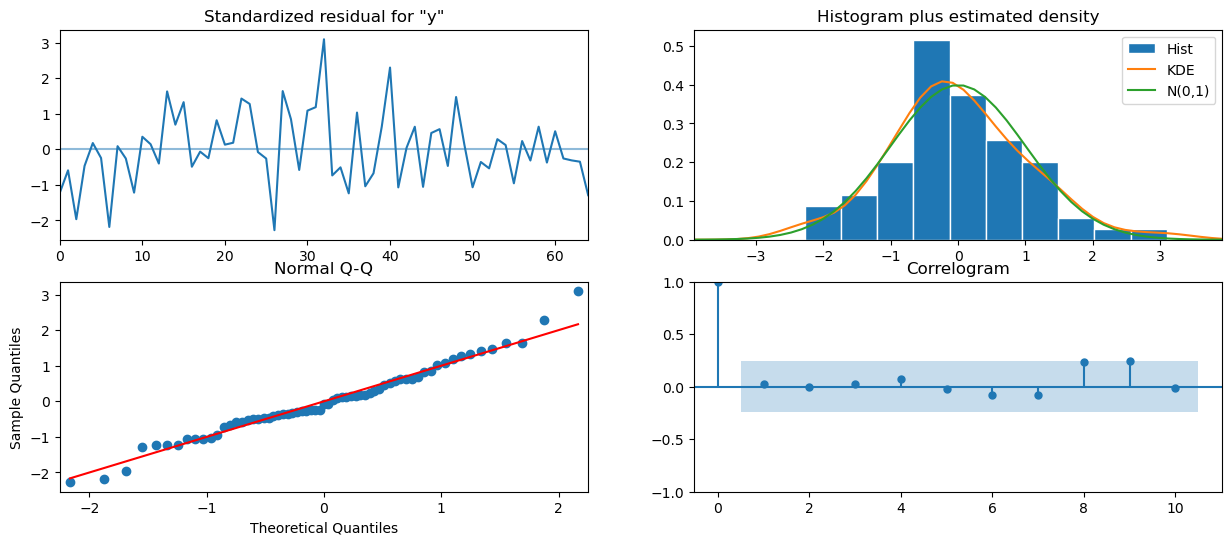

In [145]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [146]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [147]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   98.795028  14.961886      69.470271     128.119786
1  125.362230  15.208538      95.554043     155.170417
2   44.890262  15.226452      15.046965      74.733560
3   60.659579  15.431733      30.413938      90.905221
4   62.626596  15.434874      32.374800      92.878393

In [148]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

13.96034436397709


In [149]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(4,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)             30.903804
ARIMA(4,1,2)             30.607788
SARIMA(0,1,2)(2,0,2,12)  25.343324
SARIMA(0,1,2)(1,0,2,24)  19.581159
SARIMA(4,1,2)(4,1,2,12)  13.960344

In [150]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(1, 0, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03017D+00    |proj g|=  2.61234D-01


/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  2.74289D+00    |proj g|=  6.33362D-02

At iterate   10    f=  2.71821D+00    |proj g|=  1.35671D-02

At iterate   15    f=  2.62452D+00    |proj g|=  1.72737D-01

At iterate   20    f=  2.57807D+00    |proj g|=  1.17103D-01

At iterate   25    f=  2.55800D+00    |proj g|=  6.08686D-02

At iterate   30    f=  2.54524D+00    |proj g|=  7.33870D-02

At iterate   35    f=  2.52609D+00    |proj g|=  5.19901D-02

At iterate   40    f=  2.52278D+00    |proj g|=  1.01473D-02

At iterate   45    f=  2.52236D+00    |proj g|=  1.15505D-03

At iterate   50    f=  2.52236D+00    |proj g|=  1.20010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

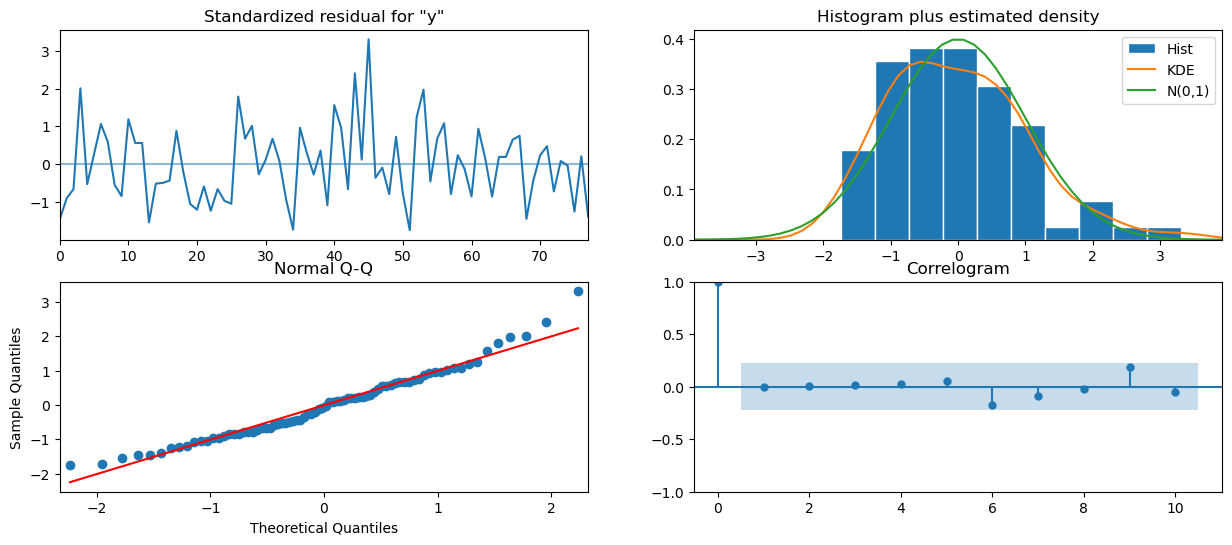

In [151]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [152]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [153]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   93.012882  14.631062      64.336527     121.689236
1  116.070103  14.704675      87.249470     144.890737
2   56.989493  14.702018      28.174067      85.804920
3   66.703424  14.701215      37.889572      95.517276
4   78.321689  14.713372      49.484010     107.159369

In [154]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

17.70030013045795


### 5.4 Check the performance of the models built

In [155]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(1,2,0,24)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

Model22 = resultsDf

Model22

RMSE
ARIMA(0,1,2)             30.903804
ARIMA(4,1,2)             30.607788
SARIMA(0,1,2)(2,0,2,12)  25.343324
SARIMA(0,1,2)(1,0,2,24)  19.581159
SARIMA(4,1,2)(4,1,2,12)  13.960344
SARIMA(4,1,2)(1,2,0,24)  17.700300

In [156]:
# In the models build using ARIMA & SARIMA the best model is Manual SARIMA with params of (2,1,2) (2,1,2,12) if seasonality 12 has the lowest RMSE among the other models.


## 6. Compare the performance of the models

### 6.1 Compare the performance of all the models built

In [157]:
#concat_df = pd.concat([Model11, Model22])

#concat_df

In [158]:
Model11

Test RMSE
RegressionOnTime                                    17.355796
2pointTrailingMovingAverage                         11.801043
4pointTrailingMovingAverage                         15.367212
6pointTrailingMovingAverage                         15.862350
9pointTrailingMovingAverage                         16.341919
Alpha=0.1027210902642377,SimpleExponentialSmoot...  30.188322
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.099,Beta=1.993,Gamma=0.000,TripleExpone...   9.328733
Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialS...   9.129075

In [159]:
Model22

RMSE
ARIMA(0,1,2)             30.903804
ARIMA(4,1,2)             30.607788
SARIMA(0,1,2)(2,0,2,12)  25.343324
SARIMA(0,1,2)(1,0,2,24)  19.581159
SARIMA(4,1,2)(4,1,2,12)  13.960344
SARIMA(4,1,2)(1,2,0,24)  17.700300

### 6.2 Choose the best model with proper rationale 

The best model to choose is the Manual SARIMA model with best params of (4,1,2) (4,1,2,12) and seasonality 12 has the lowest RMSE values across all the model

### 6.3 Rebuild the best model using the entire data 

Building the most optimum model on the Full Data.

In [160]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(4,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/srinivasant/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73090D+00    |proj g|=  1.12728D-01

At iterate    5    f=  2.69528D+00    |proj g|=  2.44484D-02

At iterate   10    f=  2.67820D+00    |proj g|=  2.33859D-02

At iterate   15    f=  2.60936D+00    |proj g|=  6.81183D-02

At iterate   20    f=  2.59914D+00    |proj g|=  2.12385D-02

At iterate   25    f=  2.59777D+00    |proj g|=  1.66060D-03

At iterate   30    f=  2.59572D+00    |proj g|=  5.10499D-02
  ys=-7.493E-04  -gs= 8.307E-04 BFGS update SKIPPED

At iterate   35    f=  2.59171D+00    |proj g|=  3.13412D-02

At iterate   40    f=  2.59128D+00    |proj g|=  6.95882D-03

At iterate   45    f=  2.59095D+00    |proj g|=  3.99271D-03

At iterate   50    f=  2.59092D+00    |proj g|=  5.44971D-04

At iterate   55    f=  2.59092D+00    |proj g|=  1.48696D-04

           * * *

Tit   = total numb

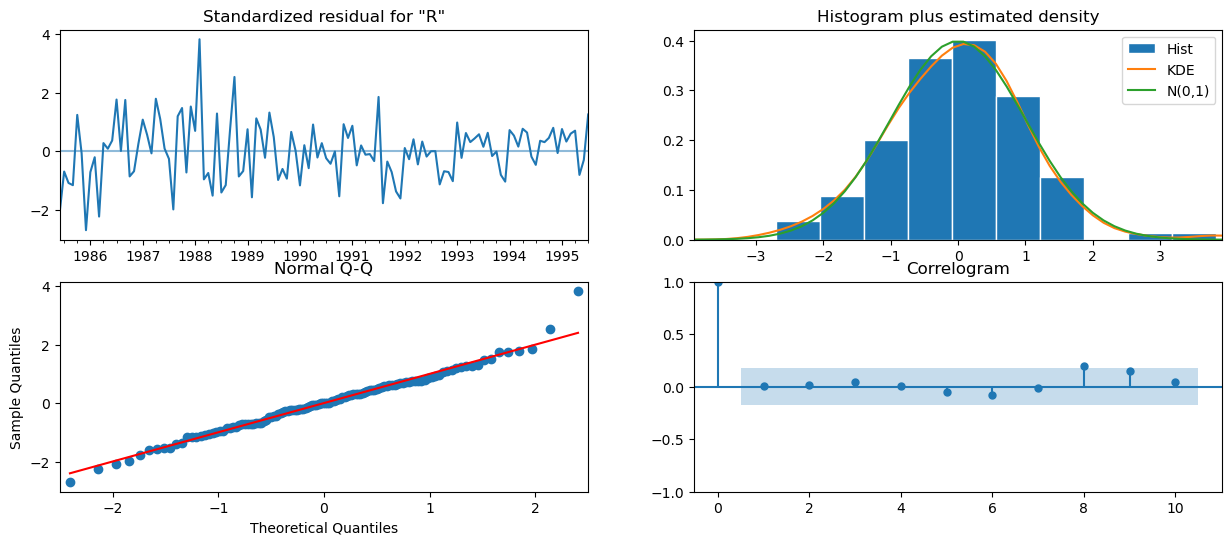

In [161]:
results_full_data_model.plot_diagnostics();

### 6.4 Make a forecast for the next 12 months

In [162]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [163]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  44.229691  12.581682      19.570048      68.889334
1995-09-01  45.911754  12.746658      20.928765      70.894744
1995-10-01  47.570357  12.797261      22.488186      72.652529
1995-11-01  59.550113  13.045375      33.981647      85.118578
1995-12-01  86.407577  13.067489      60.795769     112.019385

In [164]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 34.85289998369392


In [165]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31',freq='M'))

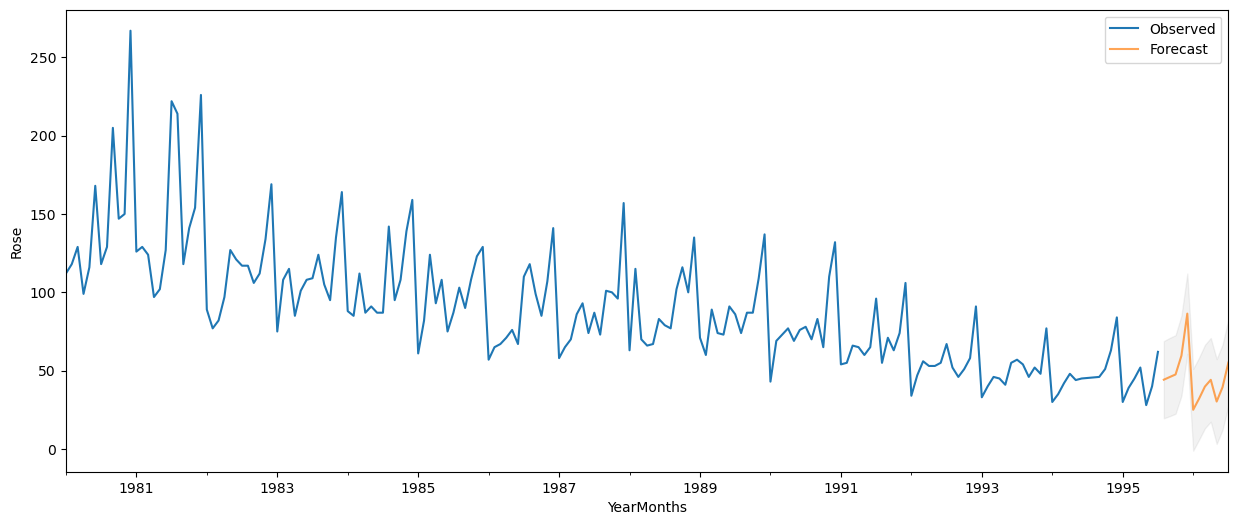

In [166]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, 
                  pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], 
                  color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [167]:
round(pred_full_manual_SARIMA_date,2)

Rose         mean  mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  44.23    12.58          19.57          68.89
1995-09-30  45.91    12.75          20.93          70.89
1995-10-31  47.57    12.80          22.49          72.65
1995-11-30  59.55    13.05          33.98          85.12
1995-12-31  86.41    13.07          60.80         112.02
1996-01-31  25.02    13.33          -1.11          51.15
1996-02-29  32.09    13.36           5.90          58.28
1996-03-31  39.84    13.59          13.21          66.48
1996-04-30  44.15    13.63          17.44          70.87
1996-05-31  30.29    13.83           3.19          57.39
1996-06-30  39.43    13.88          12.22          66.63
1996-07-31  55.18    14.05          27.64          82.72

## 7. Actionable Insights & Recommendations

### 7.1 key takeaways (actionable insights and recommendations) for the business

Insights:

•	There is no certain trend in the data series
•	There are outliers across all years data
•	In monthly trend there was decrease trend from March to June and from July there was an increasing trend
•	December month across years has the highest sales 
•	On quarterly basis the 4th quarter has the highest sales
•	The data is right skewed as the mean is greater than median
•	In decomposition, multiplicative model is the suited model as there no specific pattern in the residual
•	The data has no defined trend and has seasonality
•	Across LR, SA, MA, SES, DES & TES – TES has the lowest RMSE value
•	The DataFrame is not stationary and AD fuller method is used to make it stationary
•	Among Auto ARIMA & SARIMA, Manual ARIMA & SARIMA – Manual SARIMA with seasonality 12 has the lowest RMSE value

Recommendations:

•	The ABC Estate Wines company must ensure the stock availability of Sparkling type wines on a higher during the month of OCT, NOV & DEC on all years
•	The marketing spend can be reduced during these high sales months
•	July, Aug & Sept seems to be a avg sales months and the company can Optimize the production and marketing spend on these months
•	January month can be ignored for marketing & stock availability as it contributes to the lowest sales due the highest sales in December
•	Winter season is the influencing factor on the wine sales


